# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
# !pip install pickle-mixin
!pip install keras
!pip install tensorflow


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [2]:
#Loading data into dataframe

data1 = pd.read_csv("32_feat.csv")
benign_urls = data1[data1['class'] == -1]
phishing_urls = data1[data1['class'] == 1]
random_benign_urls = benign_urls.sample(n=4000, random_state=42)
random_phishing_urls = phishing_urls.sample(n=4000, random_state=42)
sampled_dataset = pd.concat([random_benign_urls, random_phishing_urls])
data = sampled_dataset.sample(frac=1).reset_index(drop=True)
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,2628,1,-1,1,1,1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,0,1,1
1,8028,1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,-1,1,1,0,1,-1
2,1041,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,1,0,1,1
3,254,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,-1,1,-1,1,0,1,1
4,7296,1,-1,1,1,1,-1,0,-1,-1,...,1,1,-1,1,1,1,1,0,1,-1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(8000, 32)

# Listing the features of the dataset

data.columns

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                8000 non-null   int64
 1   UsingIP              8000 non-null   int64
 2   LongURL              8000 non-null   int64
 3   ShortURL             8000 non-null   int64
 4   Symbol@              8000 non-null   int64
 5   Redirecting//        8000 non-null   int64
 6   PrefixSuffix-        8000 non-null   int64
 7   SubDomains           8000 non-null   int64
 8   HTTPS                8000 non-null   int64
 9   DomainRegLen         8000 non-null   int64
 10  Favicon              8000 non-null   int64
 11  NonStdPort           8000 non-null   int64
 12  HTTPSDomainURL       8000 non-null   int64
 13  RequestURL           8000 non-null   int64
 14  AnchorURL            8000 non-null   int64
 15  LinksInScriptTags    8000 non-null   int64
 16  ServerFormHandler    800

In [5]:
# nunique value in columns

data.nunique()

Index                  8000
UsingIP                   2
LongURL                   3
ShortURL                  2
Symbol@                   2
Redirecting//             2
PrefixSuffix-             2
SubDomains                3
HTTPS                     3
DomainRegLen              2
Favicon                   2
NonStdPort                2
HTTPSDomainURL            2
RequestURL                2
AnchorURL                 3
LinksInScriptTags         3
ServerFormHandler         3
InfoEmail                 2
AbnormalURL               2
WebsiteForwarding         2
StatusBarCust             2
DisableRightClick         2
UsingPopupWindow          2
IframeRedirection         2
AgeofDomain               2
DNSRecording              2
WebsiteTraffic            3
PageRank                  2
GoogleIndex               2
LinksPointingToPage       3
StatsReport               2
class                     2
dtype: int64

In [6]:
#droping index column

# data = data.drop(['Domain'],axis = 1)

In [7]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,8000.0,5500.032500,3207.210909,0.0,2711.75,5471.5,8288.25,11053.0
UsingIP,8000.0,0.307750,0.951527,-1.0,-1.00,1.0,1.00,1.0
LongURL,8000.0,-0.636125,0.763409,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,8000.0,0.747500,0.664303,-1.0,1.00,1.0,1.00,1.0
Symbol@,8000.0,0.690000,0.723855,-1.0,1.00,1.0,1.00,1.0
Redirecting//,8000.0,0.744750,0.667385,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,8000.0,-0.772250,0.635358,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,8000.0,0.037875,0.812418,-1.0,-1.00,0.0,1.00,1.0
HTTPS,8000.0,0.179000,0.922125,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,8000.0,-0.309250,0.951040,-1.0,-1.00,-1.0,1.00,1.0


data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

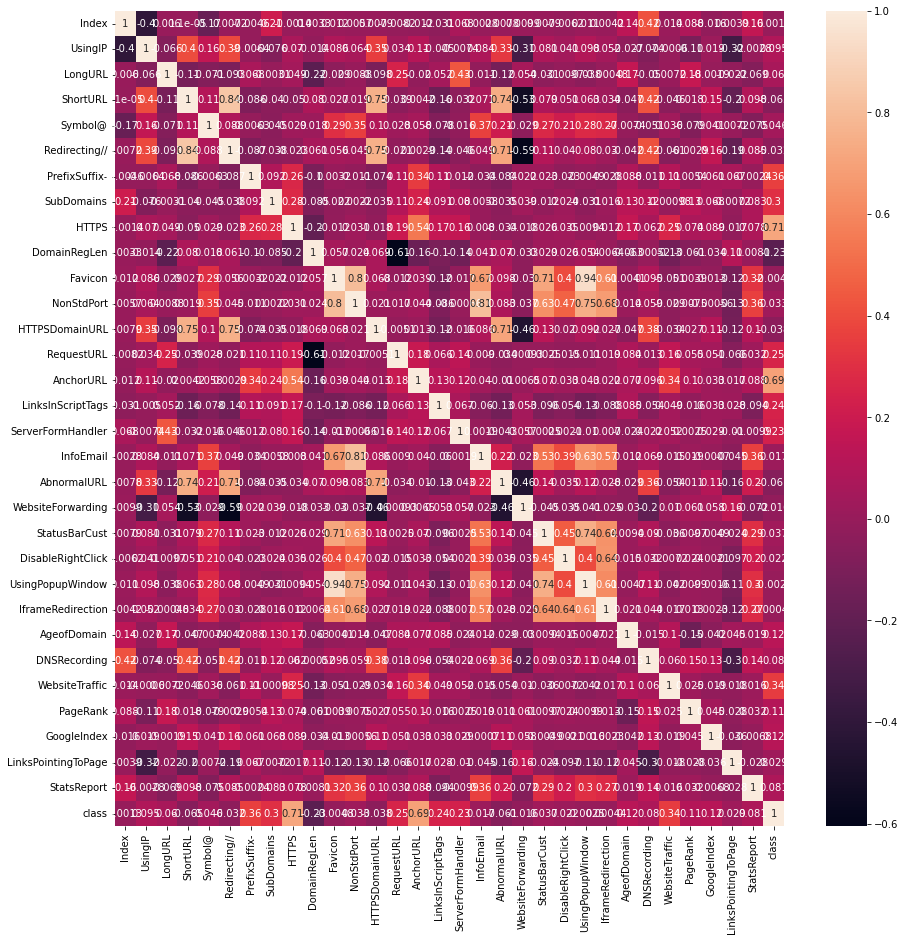

In [8]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
print(data.columns)


Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


In [10]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





KeyError: "None of [Index(['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label'], dtype='object')] are in the [columns]"

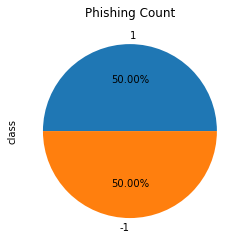

In [13]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

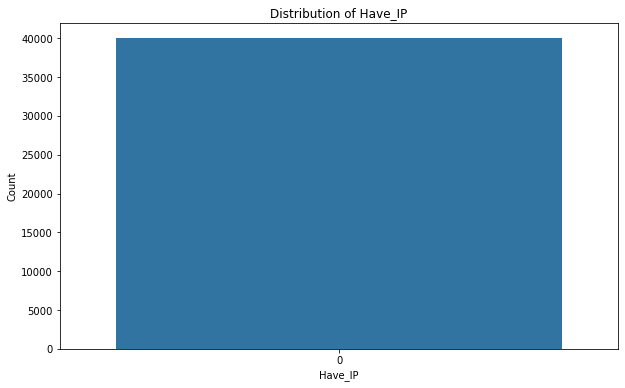

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Have_IP', data=data)
plt.title('Distribution of Have_IP')
plt.xlabel('Have_IP')
plt.ylabel('Count')
plt.show()


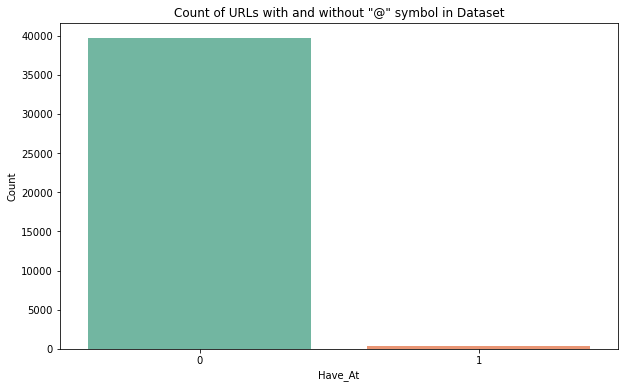

In [13]:
# Plot count plot for 'Have_At' attribute
plt.figure(figsize=(10, 6))
sns.countplot(x='Have_At', data=data, palette='Set2')
plt.xlabel('Have_At')
plt.ylabel('Count')
plt.title('Count of URLs with and without "@" symbol in Dataset')
plt.show()


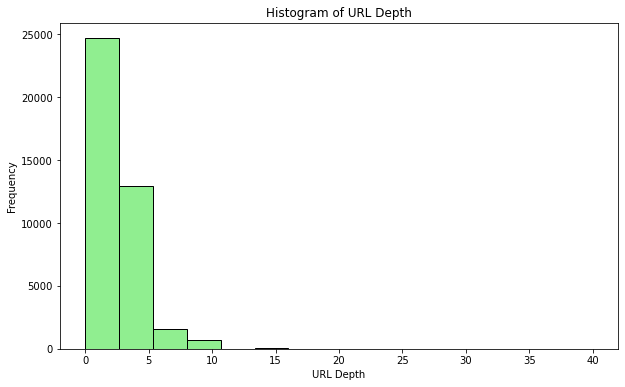

In [14]:
# Plot histogram for 'URL_Depth' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['URL_Depth'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('URL Depth')
plt.ylabel('Frequency')
plt.title('Histogram of URL Depth')
plt.show()


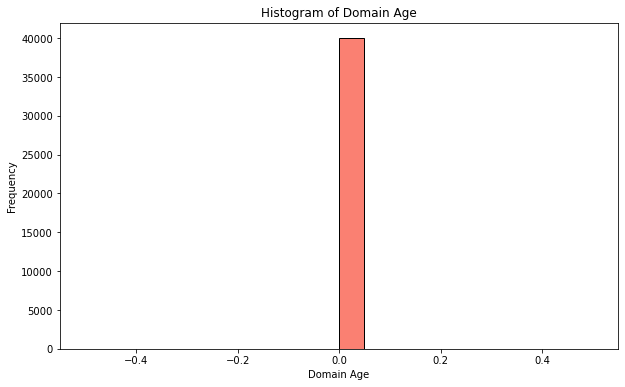

In [15]:
# Plot histogram for 'Domain_Age' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['Domain_Age'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Domain Age')
plt.ylabel('Frequency')
plt.title('Histogram of Domain Age')
plt.show()


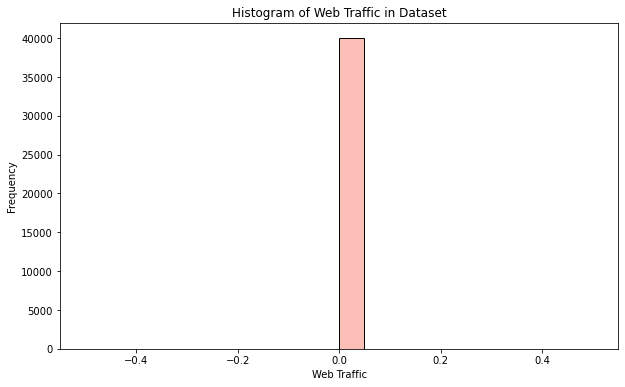

In [16]:
# Plot histogram for 'Web_Traffic' attribute
plt.figure(figsize=(10, 6))
sns.histplot(data['Web_Traffic'], bins=20, kde=True, color='salmon')
plt.xlabel('Web Traffic')
plt.ylabel('Frequency')
plt.title('Histogram of Web Traffic in Dataset')
plt.show()


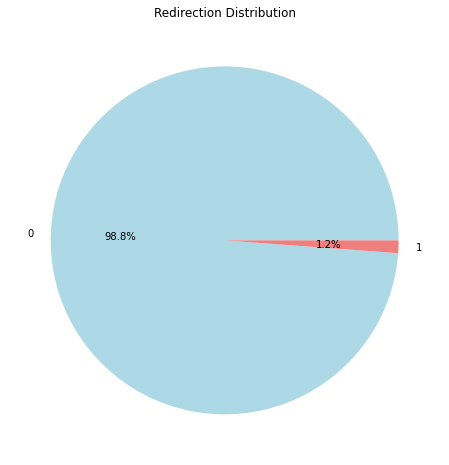

In [17]:
# Plot pie chart for 'Redirection' attribute
plt.figure(figsize=(8, 8))
data['Redirection'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Redirection Distribution')
plt.ylabel('')
plt.show()


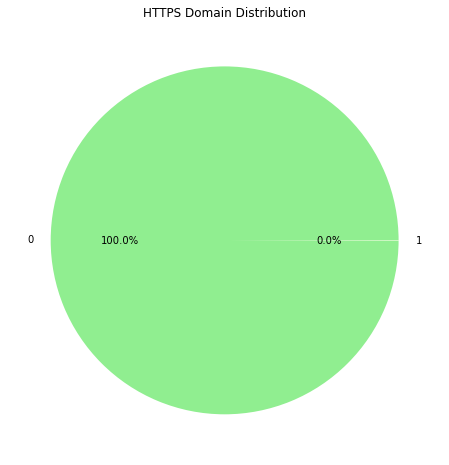

In [18]:
# Plot pie chart for 'https_Domain' attribute
plt.figure(figsize=(8, 8))
data['https_Domain'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.title('HTTPS Domain Distribution')
plt.ylabel('')
plt.show()


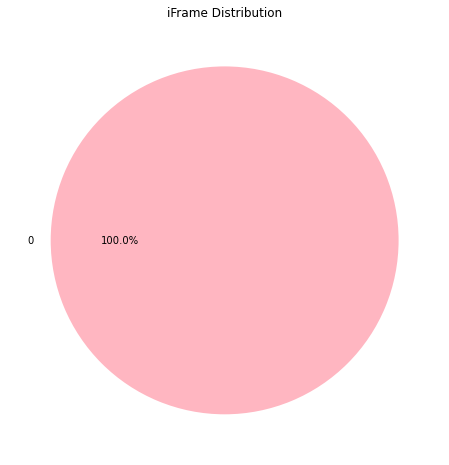

In [19]:
# Plot pie chart for 'iFrame' attribute
plt.figure(figsize=(8, 8))
data['iFrame'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightgrey'])
plt.title('iFrame Distribution')
plt.ylabel('')
plt.show()



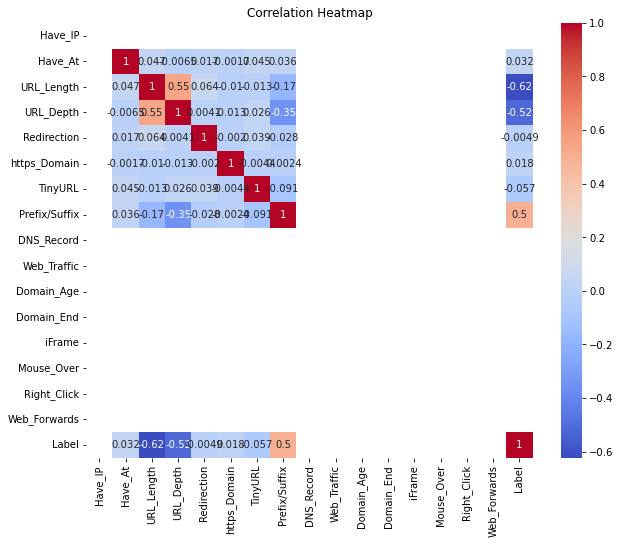

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



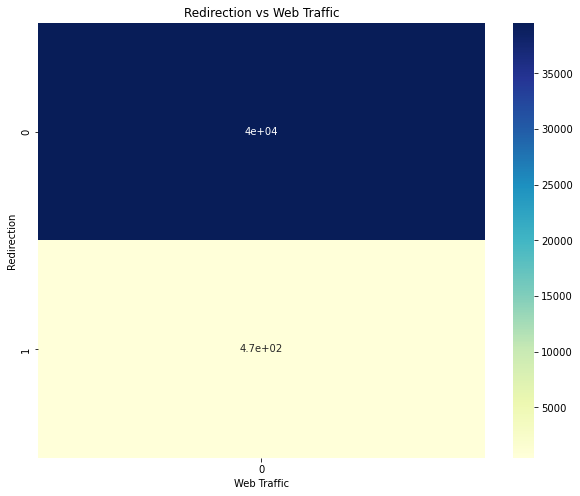

In [21]:
# Plot heatmap for Redirection vs Web Traffic
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(data['Redirection'], data['Web_Traffic']), annot=True, cmap='YlGnBu')
plt.title('Redirection vs Web Traffic')
plt.xlabel('Web Traffic')
plt.ylabel('Redirection')
plt.show()


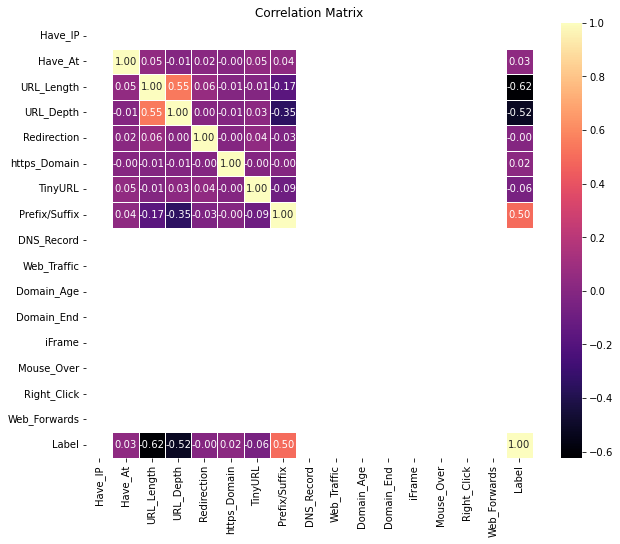

In [22]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


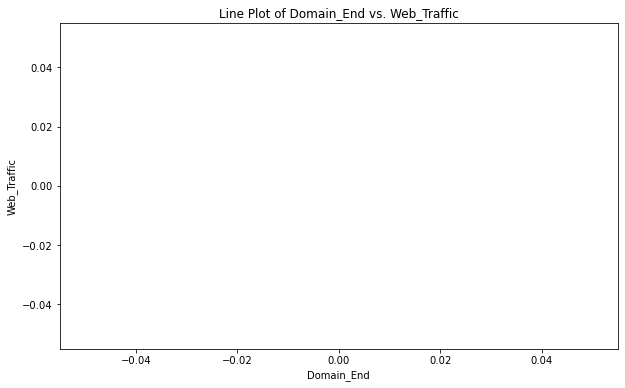

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Domain_End', y='Web_Traffic', data=data)
plt.title('Line Plot of Domain_End vs. Web_Traffic')
plt.xlabel('Domain_End')
plt.ylabel('Web_Traffic')
plt.show()


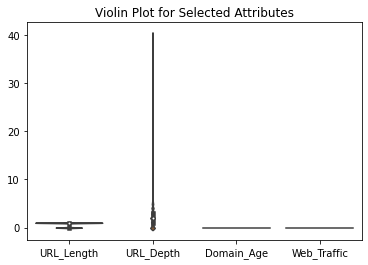

In [24]:
# Create violin plot
attributes_boxplot = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']
sns.violinplot(data=data[attributes_boxplot])
plt.title('Violin Plot for Selected Attributes')
plt.show()


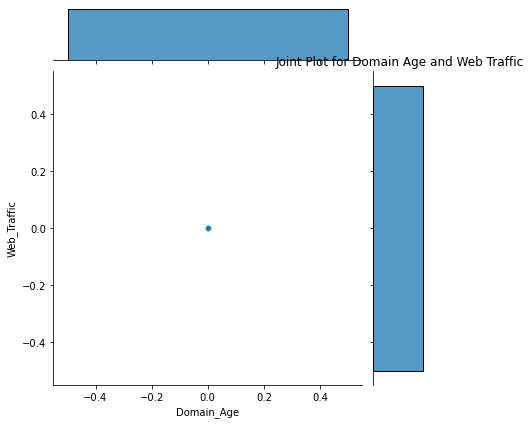

In [25]:
# Select attributes for joint plot
attributes_jointplot = ['Domain_Age', 'Web_Traffic']

# Create joint plot
sns.jointplot(x='Domain_Age', y='Web_Traffic', data=data[attributes_jointplot], kind='scatter')
plt.title('Joint Plot for Domain Age and Web Traffic')
plt.show()


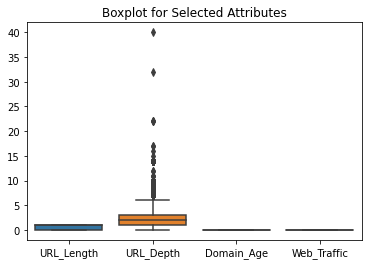

In [26]:
import seaborn as sns

# Select attributes for boxplot
attributes_boxplot = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']

# Create boxplot
sns.boxplot(data=data[attributes_boxplot])
plt.title('Boxplot for Selected Attributes')
plt.show()


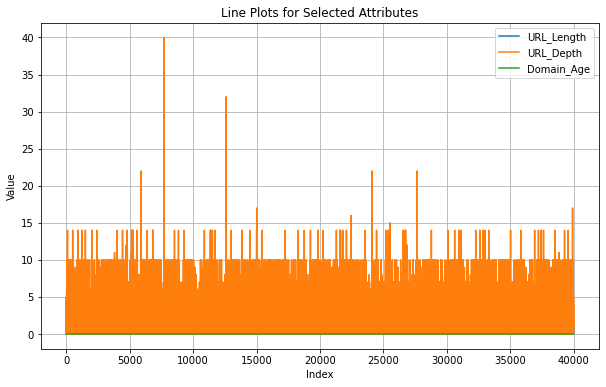

In [27]:
import matplotlib.pyplot as plt

# Define attributes for line plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age']

# Plot line plots for each attribute
plt.figure(figsize=(10, 6))
for attribute in attributes:
    plt.plot(data[attribute], label=attribute)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plots for Selected Attributes')
plt.legend()
plt.grid(True)
plt.show()


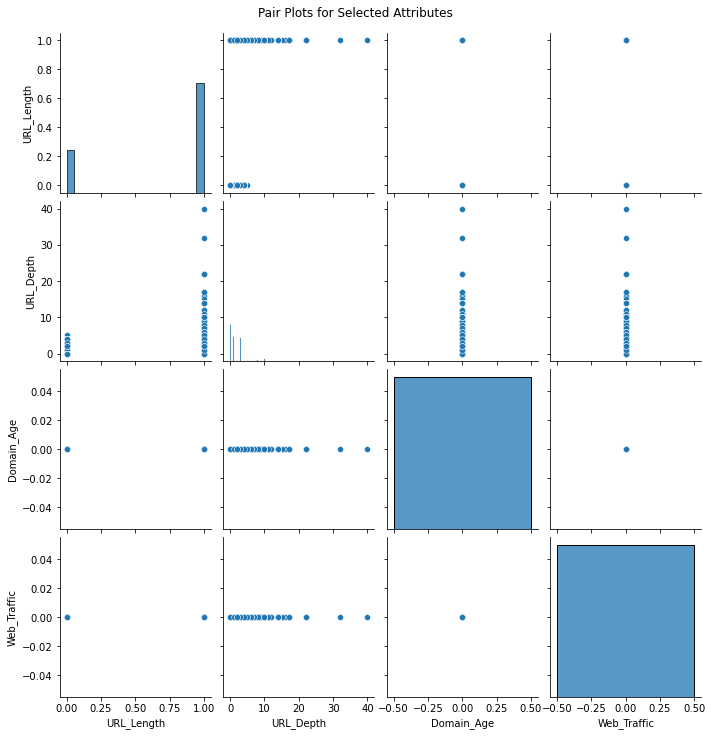

In [28]:
import seaborn as sns

# Select attributes for pair plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']

# Create pair plots
sns.pairplot(data[attributes])
plt.suptitle('Pair Plots for Selected Attributes', y=1.02)
plt.show()


## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [15]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6400, 31), (6400,), (1600, 31), (1600,))

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating an empty DataFrame with column names
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

# Loop through the features and append each row to the DataFrame
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Get feature importances from the RandomForestClassifier
feature_importances = rfecv.estimator_.feature_importances_

# Combine features and importances into a list of tuples
feature_scores = list(zip(best_features, feature_importances))

# Sort features based on importance scores in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the selected features along with their importance scores in descending order
print("Selected Features and Importance Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Importance Scores (Descending Order):
DisableRightClick: 0.2865808905044865
LinksPointingToPage: 0.24665274719220592
ShortURL: 0.07273112878296888
Index: 0.06933941481581411
UsingPopupWindow: 0.05977760442977662
IframeRedirection: 0.04185605425547457
LinksInScriptTags: 0.04019629507059797
RequestURL: 0.022030931838752654
ServerFormHandler: 0.017919206890415495
StatusBarCust: 0.016181188390217986
AnchorURL: 0.01529244116711043
Redirecting//: 0.013829025635310962
UsingIP: 0.010514665797130757
GoogleIndex: 0.009730695318721987
Symbol@: 0.009444814562380856
LongURL: 0.009437751309382906
PageRank: 0.006083168949707719
SubDomains: 0.005023082809312391
HTTPSDomainURL: 0.0049582816279353575
WebsiteTraffic: 0.004907823711543142
InfoEmail: 0.004607883756286017
Favicon: 0.004464842662381031
DNSRecording: 0.004119110404434312
StatsReport: 0.004103952632639176
NonStdPort: 0.004060518556094232
WebsiteForwarding: 0.0038086452127367135
AgeofDomain: 0.003368123014027671
DomainRegL

In [22]:
best_features=['DisableRightClick','LinksPointingToPage','ShortURL','Index','UsingPopupWindow','IframeRedirection','LinksInScriptTags','RequestURL','ServerFormHandler','StatusBarCust']
# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6400, 10), (6400,), (1600, 10), (1600,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [23]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [24]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [26]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.671
Logistic Regression : Accuracy on test Data: 0.668

Logistic Regression : f1_score on training Data: 0.667
Logistic Regression : f1_score on test Data: 0.662

Logistic Regression : Recall on training Data: 0.661
Logistic Regression : Recall on test Data: 0.648

Logistic Regression : precision on training Data: 0.674
Logistic Regression : precision on test Data: 0.677


In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.87      0.86      0.86       776
           1       0.87      0.88      0.87       824

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

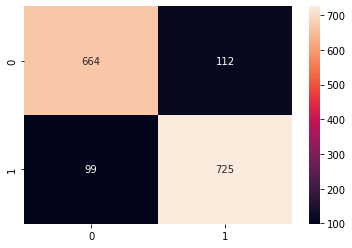

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [33]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [35]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.587

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.583

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.561

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.607


In [36]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.57      0.61      0.59       776
           1       0.61      0.56      0.58       824

    accuracy                           0.59      1600
   macro avg       0.59      0.59      0.59      1600
weighted avg       0.59      0.59      0.59      1600



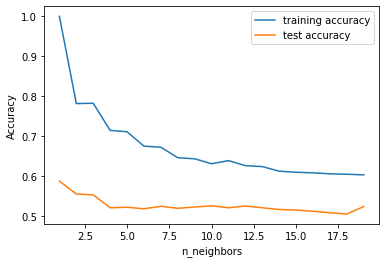

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

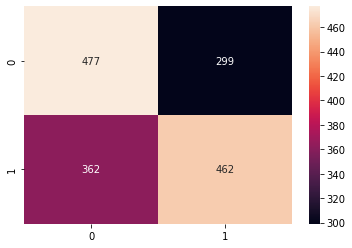

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


In [ ]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [53]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [54]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [55]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [56]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.895
Naive Bayes Classifier : Accuracy on test Data: 0.903

Naive Bayes Classifier : f1_score on training Data: 0.884
Naive Bayes Classifier : f1_score on test Data: 0.892

Naive Bayes Classifier : Recall on training Data: 0.796
Naive Bayes Classifier : Recall on test Data: 0.808

Naive Bayes Classifier : precision on training Data: 0.993
Naive Bayes Classifier : precision on test Data: 0.995


In [57]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.83      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<Axes: >

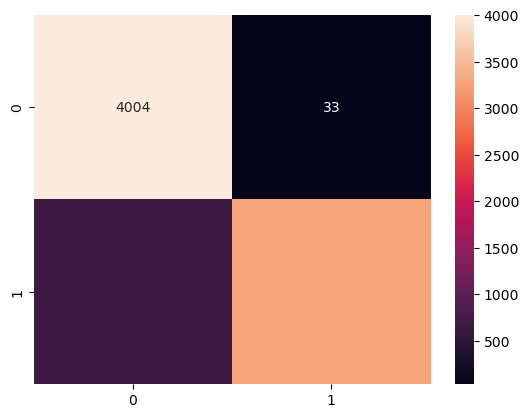

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [59]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [60]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [61]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [62]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.904
Decision Tree : Accuracy on test Data: 0.911

Decision Tree : f1_score on training Data: 0.896
Decision Tree : f1_score on test Data: 0.902

Decision Tree : Recall on training Data: 0.819
Decision Tree : Recall on test Data: 0.828

Decision Tree : precision on training Data: 0.988
Decision Tree : precision on test Data: 0.991


In [63]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.83      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



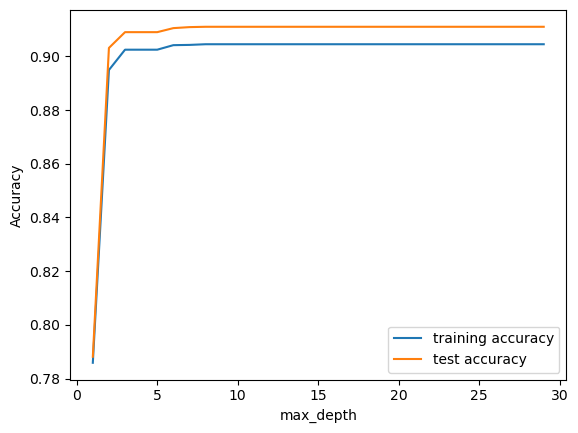

In [64]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [65]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

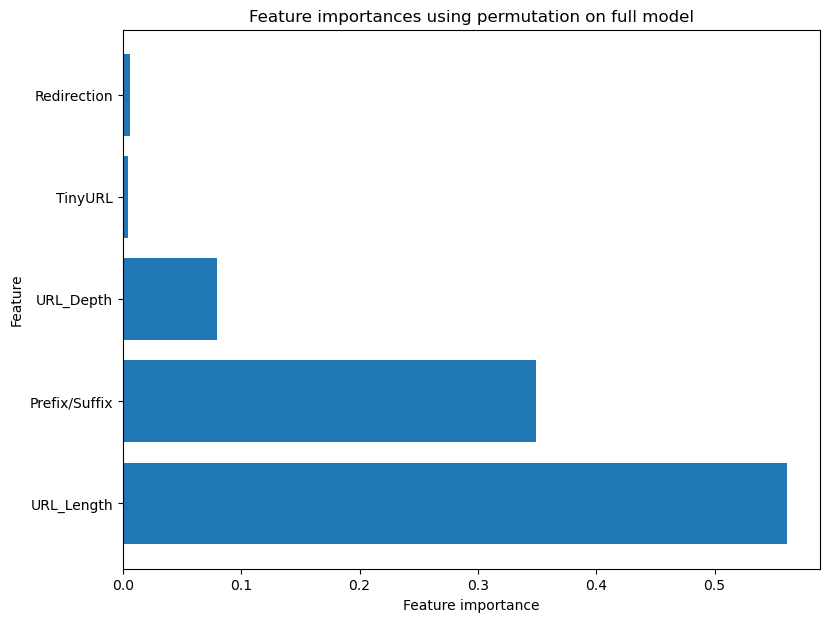

In [66]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [67]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [68]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [69]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.904
Random Forest : Accuracy on test Data: 0.911

Random Forest : f1_score on training Data: 0.896
Random Forest : f1_score on test Data: 0.902

Random Forest : Recall on training Data: 0.819
Random Forest : Recall on test Data: 0.828

Random Forest : precision on training Data: 0.988
Random Forest : precision on test Data: 0.991


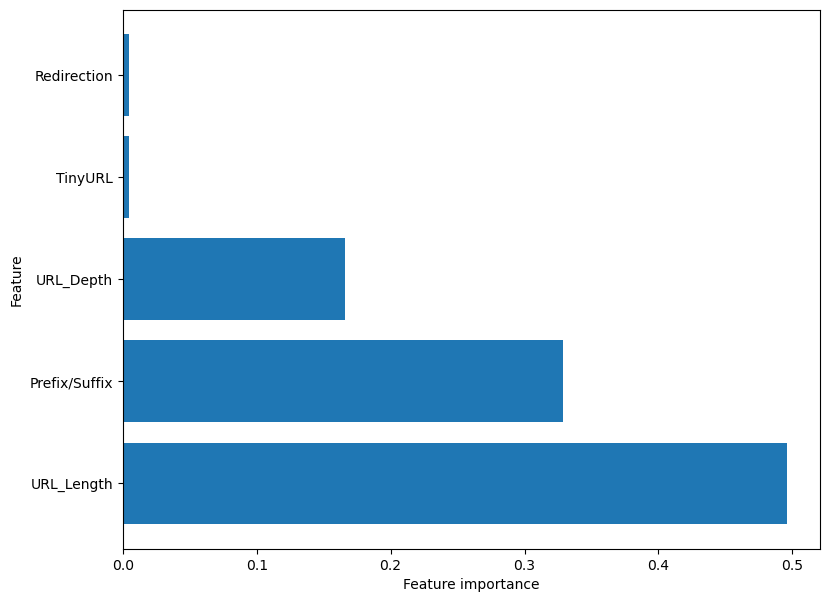

In [70]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [71]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.83      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



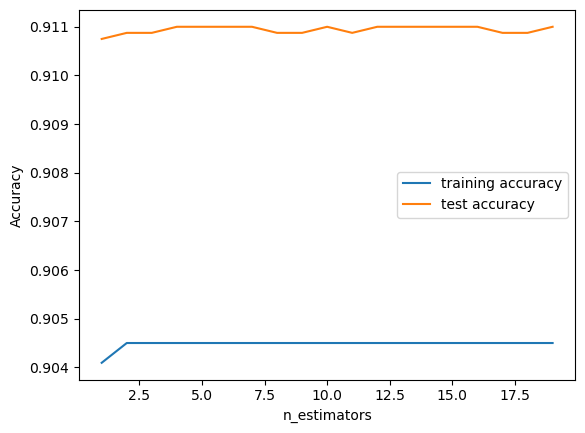

In [72]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [73]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [74]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [75]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [76]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.904
Gradient Boosting Classifier : Accuracy on test Data: 0.911

Gradient Boosting Classifier : f1_score on training Data: 0.896
Gradient Boosting Classifier : f1_score on test Data: 0.902

Gradient Boosting Classifier : Recall on training Data: 0.819
Gradient Boosting Classifier : Recall on test Data: 0.828

Gradient Boosting Classifier : precision on training Data: 0.988
Gradient Boosting Classifier : precision on test Data: 0.991


In [77]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.83      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



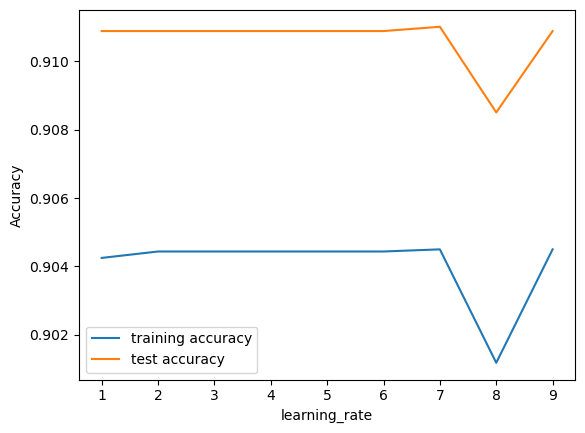

In [78]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

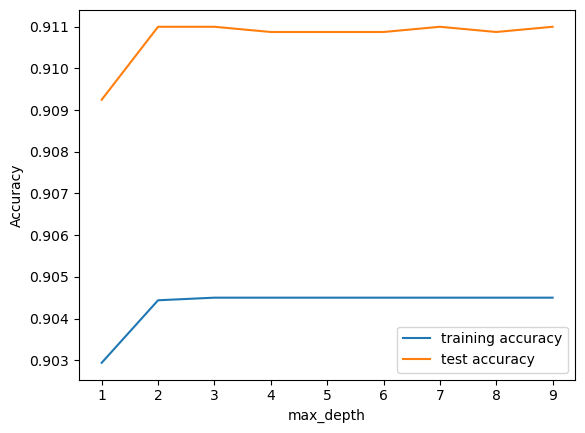

In [79]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [80]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [81]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5430872	total: 63.1ms	remaining: 1m 2s
1:	learn: 0.4469822	total: 67.2ms	remaining: 33.5s
2:	learn: 0.3905867	total: 70.5ms	remaining: 23.4s
3:	learn: 0.3519610	total: 75ms	remaining: 18.7s
4:	learn: 0.3250156	total: 78.8ms	remaining: 15.7s
5:	learn: 0.3060668	total: 82.5ms	remaining: 13.7s
6:	learn: 0.2928526	total: 86ms	remaining: 12.2s
7:	learn: 0.2823081	total: 89.1ms	remaining: 11s
8:	learn: 0.2743154	total: 92.1ms	remaining: 10.1s
9:	learn: 0.2687399	total: 95.1ms	remaining: 9.41s
10:	learn: 0.2634759	total: 98.4ms	remaining: 8.85s
11:	learn: 0.2591574	total: 102ms	remaining: 8.36s
12:	learn: 0.2563801	total: 105ms	remaining: 7.96s
13:	learn: 0.2537200	total: 108ms	remaining: 7.59s
14:	learn: 0.2514616	total: 111ms	remaining: 7.29s
15:	learn: 0.2497642	total: 114ms	remaining: 7.01s
16:	learn: 0.2479751	total: 117ms	remaining: 6.79s
17:	learn: 0.2463906	total: 121ms	remaining: 6.61s
18:	learn: 0.2456041	total: 125ms	remaining: 6.43s
19:	learn: 0.2446854	total: 127ms	re

In [82]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [83]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.904
CatBoost Classifier : Accuracy on test Data: 0.911

CatBoost Classifier : f1_score on training Data: 0.896
CatBoost Classifier : f1_score on test Data: 0.902

CatBoost Classifier : Recall on training Data: 0.819
CatBoost Classifier : Recall on test Data: 0.828

CatBoost Classifier : precision on training Data: 0.988
CatBoost Classifier : precision on test Data: 0.991


In [84]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.83      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



In [85]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5430872	total: 3.98ms	remaining: 3.98s
1:	learn: 0.4469822	total: 7.25ms	remaining: 3.62s
2:	learn: 0.3905867	total: 10.4ms	remaining: 3.46s
3:	learn: 0.3519610	total: 13.5ms	remaining: 3.36s
4:	learn: 0.3250156	total: 16.9ms	remaining: 3.37s
5:	learn: 0.3060668	total: 20.3ms	remaining: 3.36s
6:	learn: 0.2928526	total: 23.9ms	remaining: 3.39s
7:	learn: 0.2823081	total: 26.9ms	remaining: 3.33s
8:	learn: 0.2743154	total: 30.3ms	remaining: 3.34s
9:	learn: 0.2687399	total: 33.5ms	remaining: 3.31s
10:	learn: 0.2634759	total: 37.2ms	remaining: 3.35s
11:	learn: 0.2591574	total: 40.3ms	remaining: 3.32s
12:	learn: 0.2563801	total: 43.6ms	remaining: 3.31s
13:	learn: 0.2537200	total: 46.4ms	remaining: 3.27s
14:	learn: 0.2514616	total: 49.5ms	remaining: 3.25s
15:	learn: 0.2497642	total: 52.3ms	remaining: 3.22s
16:	learn: 0.2479751	total: 55.7ms	remaining: 3.22s
17:	learn: 0.2463906	total: 58.9ms	remaining: 3.21s
18:	learn: 0.2456041	total: 62.2ms	remaining: 3.21s
19:	learn: 0.2446854	t

1:	learn: 0.4355530	total: 27.2ms	remaining: 13.6s
2:	learn: 0.4158714	total: 39.5ms	remaining: 13.1s
3:	learn: 0.4039908	total: 52ms	remaining: 13s
4:	learn: 0.3944347	total: 63.8ms	remaining: 12.7s
5:	learn: 0.3871924	total: 76.3ms	remaining: 12.6s
6:	learn: 0.3792515	total: 88.8ms	remaining: 12.6s
7:	learn: 0.3762449	total: 101ms	remaining: 12.5s
8:	learn: 0.3731315	total: 114ms	remaining: 12.5s
9:	learn: 0.3633708	total: 127ms	remaining: 12.5s
10:	learn: 0.3604946	total: 139ms	remaining: 12.5s
11:	learn: 0.3567806	total: 152ms	remaining: 12.5s
12:	learn: 0.3551794	total: 165ms	remaining: 12.5s
13:	learn: 0.3537147	total: 178ms	remaining: 12.5s
14:	learn: 0.3475525	total: 190ms	remaining: 12.5s
15:	learn: 0.3447708	total: 202ms	remaining: 12.4s
16:	learn: 0.3427793	total: 214ms	remaining: 12.4s
17:	learn: 0.3402489	total: 227ms	remaining: 12.4s
18:	learn: 0.3350952	total: 240ms	remaining: 12.4s
19:	learn: 0.3317603	total: 252ms	remaining: 12.4s
20:	learn: 0.3291339	total: 265ms	rema

174:	learn: 0.2983280	total: 2.19s	remaining: 10.3s
175:	learn: 0.2982682	total: 2.2s	remaining: 10.3s
176:	learn: 0.2982342	total: 2.21s	remaining: 10.3s
177:	learn: 0.2982309	total: 2.23s	remaining: 10.3s
178:	learn: 0.2982292	total: 2.24s	remaining: 10.3s
179:	learn: 0.2981982	total: 2.25s	remaining: 10.2s
180:	learn: 0.2981833	total: 2.26s	remaining: 10.2s
181:	learn: 0.2981689	total: 2.27s	remaining: 10.2s
182:	learn: 0.2981689	total: 2.28s	remaining: 10.2s
183:	learn: 0.2980967	total: 2.29s	remaining: 10.2s
184:	learn: 0.2980831	total: 2.31s	remaining: 10.2s
185:	learn: 0.2980704	total: 2.32s	remaining: 10.2s
186:	learn: 0.2980380	total: 2.33s	remaining: 10.1s
187:	learn: 0.2980129	total: 2.34s	remaining: 10.1s
188:	learn: 0.2980085	total: 2.36s	remaining: 10.1s
189:	learn: 0.2979713	total: 2.37s	remaining: 10.1s
190:	learn: 0.2979647	total: 2.38s	remaining: 10.1s
191:	learn: 0.2979489	total: 2.39s	remaining: 10.1s
192:	learn: 0.2979151	total: 2.41s	remaining: 10.1s
193:	learn: 0

347:	learn: 0.2965853	total: 4.17s	remaining: 7.8s
348:	learn: 0.2965830	total: 4.18s	remaining: 7.79s
349:	learn: 0.2965743	total: 4.19s	remaining: 7.78s
350:	learn: 0.2965747	total: 4.2s	remaining: 7.77s
351:	learn: 0.2965686	total: 4.21s	remaining: 7.76s
352:	learn: 0.2965557	total: 4.23s	remaining: 7.75s
353:	learn: 0.2965563	total: 4.24s	remaining: 7.73s
354:	learn: 0.2965490	total: 4.25s	remaining: 7.72s
355:	learn: 0.2965428	total: 4.26s	remaining: 7.71s
356:	learn: 0.2965430	total: 4.27s	remaining: 7.69s
357:	learn: 0.2965336	total: 4.28s	remaining: 7.68s
358:	learn: 0.2965231	total: 4.3s	remaining: 7.67s
359:	learn: 0.2965204	total: 4.31s	remaining: 7.66s
360:	learn: 0.2965089	total: 4.32s	remaining: 7.65s
361:	learn: 0.2964790	total: 4.33s	remaining: 7.64s
362:	learn: 0.2964727	total: 4.35s	remaining: 7.63s
363:	learn: 0.2964631	total: 4.36s	remaining: 7.62s
364:	learn: 0.2964554	total: 4.37s	remaining: 7.61s
365:	learn: 0.2964543	total: 4.38s	remaining: 7.59s
366:	learn: 0.2

506:	learn: 0.2960845	total: 5.92s	remaining: 5.76s
507:	learn: 0.2960845	total: 5.93s	remaining: 5.74s
508:	learn: 0.2960822	total: 5.94s	remaining: 5.73s
509:	learn: 0.2960827	total: 5.95s	remaining: 5.72s
510:	learn: 0.2960827	total: 5.96s	remaining: 5.71s
511:	learn: 0.2960827	total: 5.97s	remaining: 5.69s
512:	learn: 0.2960826	total: 5.98s	remaining: 5.68s
513:	learn: 0.2960822	total: 5.99s	remaining: 5.67s
514:	learn: 0.2960822	total: 6.01s	remaining: 5.66s
515:	learn: 0.2960825	total: 6.02s	remaining: 5.64s
516:	learn: 0.2960824	total: 6.03s	remaining: 5.63s
517:	learn: 0.2960824	total: 6.04s	remaining: 5.62s
518:	learn: 0.2960821	total: 6.05s	remaining: 5.61s
519:	learn: 0.2960820	total: 6.06s	remaining: 5.59s
520:	learn: 0.2960818	total: 6.07s	remaining: 5.58s
521:	learn: 0.2960818	total: 6.08s	remaining: 5.57s
522:	learn: 0.2960820	total: 6.09s	remaining: 5.55s
523:	learn: 0.2960820	total: 6.1s	remaining: 5.54s
524:	learn: 0.2960819	total: 6.11s	remaining: 5.53s
525:	learn: 0

674:	learn: 0.2960670	total: 7.65s	remaining: 3.68s
675:	learn: 0.2960670	total: 7.66s	remaining: 3.67s
676:	learn: 0.2960672	total: 7.67s	remaining: 3.66s
677:	learn: 0.2960670	total: 7.68s	remaining: 3.65s
678:	learn: 0.2960676	total: 7.69s	remaining: 3.63s
679:	learn: 0.2960673	total: 7.7s	remaining: 3.62s
680:	learn: 0.2960674	total: 7.71s	remaining: 3.61s
681:	learn: 0.2960673	total: 7.72s	remaining: 3.6s
682:	learn: 0.2960677	total: 7.73s	remaining: 3.59s
683:	learn: 0.2960675	total: 7.74s	remaining: 3.58s
684:	learn: 0.2960673	total: 7.75s	remaining: 3.56s
685:	learn: 0.2960672	total: 7.76s	remaining: 3.55s
686:	learn: 0.2960673	total: 7.77s	remaining: 3.54s
687:	learn: 0.2960669	total: 7.78s	remaining: 3.53s
688:	learn: 0.2960669	total: 7.79s	remaining: 3.52s
689:	learn: 0.2960668	total: 7.8s	remaining: 3.5s
690:	learn: 0.2960667	total: 7.81s	remaining: 3.49s
691:	learn: 0.2960666	total: 7.82s	remaining: 3.48s
692:	learn: 0.2960665	total: 7.83s	remaining: 3.47s
693:	learn: 0.29

844:	learn: 0.2960425	total: 9.4s	remaining: 1.72s
845:	learn: 0.2960426	total: 9.41s	remaining: 1.71s
846:	learn: 0.2960425	total: 9.42s	remaining: 1.7s
847:	learn: 0.2960427	total: 9.43s	remaining: 1.69s
848:	learn: 0.2960426	total: 9.44s	remaining: 1.68s
849:	learn: 0.2960427	total: 9.45s	remaining: 1.67s
850:	learn: 0.2960427	total: 9.46s	remaining: 1.66s
851:	learn: 0.2960426	total: 9.47s	remaining: 1.64s
852:	learn: 0.2960425	total: 9.48s	remaining: 1.63s
853:	learn: 0.2960426	total: 9.49s	remaining: 1.62s
854:	learn: 0.2960427	total: 9.5s	remaining: 1.61s
855:	learn: 0.2960426	total: 9.51s	remaining: 1.6s
856:	learn: 0.2960426	total: 9.52s	remaining: 1.59s
857:	learn: 0.2960427	total: 9.53s	remaining: 1.58s
858:	learn: 0.2960427	total: 9.54s	remaining: 1.56s
859:	learn: 0.2960427	total: 9.55s	remaining: 1.55s
860:	learn: 0.2960427	total: 9.56s	remaining: 1.54s
861:	learn: 0.2960425	total: 9.57s	remaining: 1.53s
862:	learn: 0.2960425	total: 9.58s	remaining: 1.52s
863:	learn: 0.29

16:	learn: 0.3332444	total: 213ms	remaining: 12.3s
17:	learn: 0.3319703	total: 226ms	remaining: 12.4s
18:	learn: 0.3309385	total: 238ms	remaining: 12.3s
19:	learn: 0.3292823	total: 250ms	remaining: 12.3s
20:	learn: 0.3260007	total: 263ms	remaining: 12.3s
21:	learn: 0.3258589	total: 273ms	remaining: 12.1s
22:	learn: 0.3249885	total: 285ms	remaining: 12.1s
23:	learn: 0.3218967	total: 297ms	remaining: 12.1s
24:	learn: 0.3213807	total: 310ms	remaining: 12.1s
25:	learn: 0.3196256	total: 323ms	remaining: 12.1s
26:	learn: 0.3175001	total: 335ms	remaining: 12.1s
27:	learn: 0.3163361	total: 348ms	remaining: 12.1s
28:	learn: 0.3154830	total: 361ms	remaining: 12.1s
29:	learn: 0.3145244	total: 373ms	remaining: 12.1s
30:	learn: 0.3127260	total: 386ms	remaining: 12.1s
31:	learn: 0.3124291	total: 398ms	remaining: 12s
32:	learn: 0.3113069	total: 411ms	remaining: 12s
33:	learn: 0.3109488	total: 423ms	remaining: 12s
34:	learn: 0.3102411	total: 436ms	remaining: 12s
35:	learn: 0.3099769	total: 448ms	remai

193:	learn: 0.2968171	total: 2.34s	remaining: 9.73s
194:	learn: 0.2968173	total: 2.35s	remaining: 9.71s
195:	learn: 0.2968167	total: 2.36s	remaining: 9.69s
196:	learn: 0.2968162	total: 2.4s	remaining: 9.77s
197:	learn: 0.2968161	total: 2.41s	remaining: 9.75s
198:	learn: 0.2968163	total: 2.42s	remaining: 9.72s
199:	learn: 0.2968163	total: 2.42s	remaining: 9.7s
200:	learn: 0.2968163	total: 2.44s	remaining: 9.68s
201:	learn: 0.2968161	total: 2.45s	remaining: 9.66s
202:	learn: 0.2968162	total: 2.46s	remaining: 9.64s
203:	learn: 0.2968162	total: 2.47s	remaining: 9.62s
204:	learn: 0.2968161	total: 2.48s	remaining: 9.6s
205:	learn: 0.2968161	total: 2.48s	remaining: 9.58s
206:	learn: 0.2968161	total: 2.5s	remaining: 9.56s
207:	learn: 0.2968166	total: 2.5s	remaining: 9.54s
208:	learn: 0.2968165	total: 2.52s	remaining: 9.52s
209:	learn: 0.2968166	total: 2.53s	remaining: 9.51s
210:	learn: 0.2968168	total: 2.54s	remaining: 9.48s
211:	learn: 0.2968167	total: 2.54s	remaining: 9.46s
212:	learn: 0.296

359:	learn: 0.2965797	total: 4.08s	remaining: 7.26s
360:	learn: 0.2965569	total: 4.09s	remaining: 7.25s
361:	learn: 0.2965482	total: 4.11s	remaining: 7.24s
362:	learn: 0.2965067	total: 4.12s	remaining: 7.23s
363:	learn: 0.2965035	total: 4.13s	remaining: 7.22s
364:	learn: 0.2964487	total: 4.14s	remaining: 7.21s
365:	learn: 0.2964343	total: 4.16s	remaining: 7.2s
366:	learn: 0.2964344	total: 4.17s	remaining: 7.19s
367:	learn: 0.2964126	total: 4.18s	remaining: 7.18s
368:	learn: 0.2964085	total: 4.19s	remaining: 7.17s
369:	learn: 0.2963915	total: 4.2s	remaining: 7.16s
370:	learn: 0.2963792	total: 4.22s	remaining: 7.15s
371:	learn: 0.2963714	total: 4.23s	remaining: 7.14s
372:	learn: 0.2963501	total: 4.24s	remaining: 7.13s
373:	learn: 0.2963445	total: 4.26s	remaining: 7.12s
374:	learn: 0.2963223	total: 4.27s	remaining: 7.12s
375:	learn: 0.2963058	total: 4.28s	remaining: 7.1s
376:	learn: 0.2962928	total: 4.29s	remaining: 7.09s
377:	learn: 0.2962873	total: 4.3s	remaining: 7.08s
378:	learn: 0.29

535:	learn: 0.2960734	total: 6.05s	remaining: 5.24s
536:	learn: 0.2960736	total: 6.06s	remaining: 5.23s
537:	learn: 0.2960735	total: 6.07s	remaining: 5.21s
538:	learn: 0.2960736	total: 6.08s	remaining: 5.2s
539:	learn: 0.2960736	total: 6.09s	remaining: 5.19s
540:	learn: 0.2960739	total: 6.1s	remaining: 5.18s
541:	learn: 0.2960738	total: 6.12s	remaining: 5.17s
542:	learn: 0.2960741	total: 6.12s	remaining: 5.15s
543:	learn: 0.2960742	total: 6.13s	remaining: 5.14s
544:	learn: 0.2960741	total: 6.14s	remaining: 5.13s
545:	learn: 0.2960740	total: 6.16s	remaining: 5.12s
546:	learn: 0.2960745	total: 6.17s	remaining: 5.11s
547:	learn: 0.2960737	total: 6.18s	remaining: 5.1s
548:	learn: 0.2960737	total: 6.19s	remaining: 5.08s
549:	learn: 0.2960739	total: 6.2s	remaining: 5.07s
550:	learn: 0.2960737	total: 6.21s	remaining: 5.06s
551:	learn: 0.2960738	total: 6.22s	remaining: 5.05s
552:	learn: 0.2960735	total: 6.23s	remaining: 5.04s
553:	learn: 0.2960740	total: 6.24s	remaining: 5.03s
554:	learn: 0.29

699:	learn: 0.2960671	total: 7.8s	remaining: 3.34s
700:	learn: 0.2960669	total: 7.82s	remaining: 3.33s
701:	learn: 0.2960669	total: 7.83s	remaining: 3.32s
702:	learn: 0.2960669	total: 7.84s	remaining: 3.31s
703:	learn: 0.2960669	total: 7.85s	remaining: 3.3s
704:	learn: 0.2960670	total: 7.86s	remaining: 3.29s
705:	learn: 0.2960671	total: 7.87s	remaining: 3.28s
706:	learn: 0.2960664	total: 7.88s	remaining: 3.27s
707:	learn: 0.2960665	total: 7.89s	remaining: 3.25s
708:	learn: 0.2960664	total: 7.9s	remaining: 3.24s
709:	learn: 0.2960665	total: 7.91s	remaining: 3.23s
710:	learn: 0.2960668	total: 7.92s	remaining: 3.22s
711:	learn: 0.2960663	total: 7.93s	remaining: 3.21s
712:	learn: 0.2960661	total: 7.94s	remaining: 3.2s
713:	learn: 0.2960664	total: 7.95s	remaining: 3.19s
714:	learn: 0.2960662	total: 7.96s	remaining: 3.17s
715:	learn: 0.2960661	total: 7.97s	remaining: 3.16s
716:	learn: 0.2960665	total: 7.98s	remaining: 3.15s
717:	learn: 0.2960661	total: 7.99s	remaining: 3.14s
718:	learn: 0.29

860:	learn: 0.2959147	total: 9.5s	remaining: 1.53s
861:	learn: 0.2959146	total: 9.51s	remaining: 1.52s
862:	learn: 0.2959144	total: 9.52s	remaining: 1.51s
863:	learn: 0.2959146	total: 9.53s	remaining: 1.5s
864:	learn: 0.2959146	total: 9.54s	remaining: 1.49s
865:	learn: 0.2959147	total: 9.54s	remaining: 1.48s
866:	learn: 0.2959132	total: 9.56s	remaining: 1.47s
867:	learn: 0.2959130	total: 9.57s	remaining: 1.46s
868:	learn: 0.2959131	total: 9.58s	remaining: 1.44s
869:	learn: 0.2959131	total: 9.59s	remaining: 1.43s
870:	learn: 0.2959130	total: 9.6s	remaining: 1.42s
871:	learn: 0.2959135	total: 9.61s	remaining: 1.41s
872:	learn: 0.2959101	total: 9.62s	remaining: 1.4s
873:	learn: 0.2959093	total: 9.63s	remaining: 1.39s
874:	learn: 0.2959094	total: 9.64s	remaining: 1.38s
875:	learn: 0.2959092	total: 9.65s	remaining: 1.37s
876:	learn: 0.2959094	total: 9.66s	remaining: 1.35s
877:	learn: 0.2959093	total: 9.67s	remaining: 1.34s
878:	learn: 0.2959094	total: 9.68s	remaining: 1.33s
879:	learn: 0.29

31:	learn: 0.3064878	total: 400ms	remaining: 12.1s
32:	learn: 0.3060657	total: 414ms	remaining: 12.1s
33:	learn: 0.3059189	total: 428ms	remaining: 12.2s
34:	learn: 0.3052803	total: 443ms	remaining: 12.2s
35:	learn: 0.3047726	total: 457ms	remaining: 12.2s
36:	learn: 0.3046855	total: 471ms	remaining: 12.3s
37:	learn: 0.3045287	total: 483ms	remaining: 12.2s
38:	learn: 0.3043185	total: 495ms	remaining: 12.2s
39:	learn: 0.3041900	total: 508ms	remaining: 12.2s
40:	learn: 0.3040317	total: 521ms	remaining: 12.2s
41:	learn: 0.3036342	total: 533ms	remaining: 12.2s
42:	learn: 0.3033008	total: 546ms	remaining: 12.1s
43:	learn: 0.3030094	total: 558ms	remaining: 12.1s
44:	learn: 0.3030094	total: 568ms	remaining: 12.1s
45:	learn: 0.3029730	total: 581ms	remaining: 12.1s
46:	learn: 0.3028164	total: 595ms	remaining: 12.1s
47:	learn: 0.3026728	total: 607ms	remaining: 12s
48:	learn: 0.3024930	total: 620ms	remaining: 12s
49:	learn: 0.3021407	total: 633ms	remaining: 12s
50:	learn: 0.3020517	total: 646ms	rem

207:	learn: 0.2964687	total: 2.55s	remaining: 9.7s
208:	learn: 0.2964678	total: 2.56s	remaining: 9.68s
209:	learn: 0.2964677	total: 2.56s	remaining: 9.65s
210:	learn: 0.2964682	total: 2.58s	remaining: 9.63s
211:	learn: 0.2964682	total: 2.59s	remaining: 9.62s
212:	learn: 0.2964677	total: 2.6s	remaining: 9.6s
213:	learn: 0.2964678	total: 2.61s	remaining: 9.58s
214:	learn: 0.2964520	total: 2.62s	remaining: 9.57s
215:	learn: 0.2964395	total: 2.63s	remaining: 9.56s
216:	learn: 0.2964395	total: 2.64s	remaining: 9.54s
217:	learn: 0.2964390	total: 2.65s	remaining: 9.52s
218:	learn: 0.2964391	total: 2.66s	remaining: 9.5s
219:	learn: 0.2964388	total: 2.67s	remaining: 9.48s
220:	learn: 0.2964379	total: 2.69s	remaining: 9.47s
221:	learn: 0.2964378	total: 2.7s	remaining: 9.45s
222:	learn: 0.2964379	total: 2.71s	remaining: 9.43s
223:	learn: 0.2964294	total: 2.72s	remaining: 9.42s
224:	learn: 0.2964286	total: 2.73s	remaining: 9.4s
225:	learn: 0.2964284	total: 2.74s	remaining: 9.38s
226:	learn: 0.2964

375:	learn: 0.2963331	total: 4.27s	remaining: 7.09s
376:	learn: 0.2963331	total: 4.28s	remaining: 7.07s
377:	learn: 0.2963329	total: 4.29s	remaining: 7.06s
378:	learn: 0.2963331	total: 4.3s	remaining: 7.04s
379:	learn: 0.2963331	total: 4.31s	remaining: 7.03s
380:	learn: 0.2963329	total: 4.32s	remaining: 7.01s
381:	learn: 0.2963333	total: 4.33s	remaining: 7s
382:	learn: 0.2963336	total: 4.34s	remaining: 6.99s
383:	learn: 0.2963332	total: 4.35s	remaining: 6.97s
384:	learn: 0.2963336	total: 4.36s	remaining: 6.96s
385:	learn: 0.2963331	total: 4.37s	remaining: 6.95s
386:	learn: 0.2963329	total: 4.38s	remaining: 6.93s
387:	learn: 0.2963326	total: 4.39s	remaining: 6.92s
388:	learn: 0.2963322	total: 4.4s	remaining: 6.91s
389:	learn: 0.2963322	total: 4.41s	remaining: 6.89s
390:	learn: 0.2963324	total: 4.42s	remaining: 6.88s
391:	learn: 0.2963324	total: 4.43s	remaining: 6.87s
392:	learn: 0.2963317	total: 4.44s	remaining: 6.86s
393:	learn: 0.2963321	total: 4.45s	remaining: 6.84s
394:	learn: 0.296

542:	learn: 0.2959617	total: 6.01s	remaining: 5.05s
543:	learn: 0.2959618	total: 6.01s	remaining: 5.04s
544:	learn: 0.2959618	total: 6.02s	remaining: 5.03s
545:	learn: 0.2959618	total: 6.03s	remaining: 5.02s
546:	learn: 0.2959617	total: 6.04s	remaining: 5s
547:	learn: 0.2959503	total: 6.06s	remaining: 5s
548:	learn: 0.2959497	total: 6.07s	remaining: 4.98s
549:	learn: 0.2959498	total: 6.08s	remaining: 4.97s
550:	learn: 0.2959498	total: 6.09s	remaining: 4.96s
551:	learn: 0.2959496	total: 6.1s	remaining: 4.95s
552:	learn: 0.2959498	total: 6.11s	remaining: 4.94s
553:	learn: 0.2959497	total: 6.12s	remaining: 4.92s
554:	learn: 0.2959495	total: 6.13s	remaining: 4.91s
555:	learn: 0.2959495	total: 6.14s	remaining: 4.9s
556:	learn: 0.2959496	total: 6.15s	remaining: 4.89s
557:	learn: 0.2959493	total: 6.16s	remaining: 4.88s
558:	learn: 0.2959495	total: 6.17s	remaining: 4.87s
559:	learn: 0.2959495	total: 6.18s	remaining: 4.86s
560:	learn: 0.2959497	total: 6.19s	remaining: 4.84s
561:	learn: 0.295949

708:	learn: 0.2958636	total: 7.72s	remaining: 3.17s
709:	learn: 0.2958636	total: 7.73s	remaining: 3.16s
710:	learn: 0.2958346	total: 7.75s	remaining: 3.15s
711:	learn: 0.2958333	total: 7.76s	remaining: 3.14s
712:	learn: 0.2958335	total: 7.77s	remaining: 3.13s
713:	learn: 0.2958340	total: 7.79s	remaining: 3.12s
714:	learn: 0.2958340	total: 7.8s	remaining: 3.11s
715:	learn: 0.2958341	total: 7.81s	remaining: 3.1s
716:	learn: 0.2958322	total: 7.82s	remaining: 3.09s
717:	learn: 0.2958322	total: 7.83s	remaining: 3.08s
718:	learn: 0.2958323	total: 7.85s	remaining: 3.07s
719:	learn: 0.2958325	total: 7.86s	remaining: 3.06s
720:	learn: 0.2958323	total: 7.87s	remaining: 3.04s
721:	learn: 0.2958328	total: 7.88s	remaining: 3.04s
722:	learn: 0.2958317	total: 7.9s	remaining: 3.02s
723:	learn: 0.2958258	total: 7.91s	remaining: 3.01s
724:	learn: 0.2958262	total: 7.92s	remaining: 3s
725:	learn: 0.2958263	total: 7.93s	remaining: 2.99s
726:	learn: 0.2958262	total: 7.94s	remaining: 2.98s
727:	learn: 0.2958

883:	learn: 0.2955450	total: 9.63s	remaining: 1.26s
884:	learn: 0.2955448	total: 9.64s	remaining: 1.25s
885:	learn: 0.2955449	total: 9.65s	remaining: 1.24s
886:	learn: 0.2955451	total: 9.66s	remaining: 1.23s
887:	learn: 0.2955447	total: 9.67s	remaining: 1.22s
888:	learn: 0.2955443	total: 9.68s	remaining: 1.21s
889:	learn: 0.2955450	total: 9.69s	remaining: 1.2s
890:	learn: 0.2955445	total: 9.7s	remaining: 1.19s
891:	learn: 0.2955445	total: 9.71s	remaining: 1.18s
892:	learn: 0.2955445	total: 9.72s	remaining: 1.16s
893:	learn: 0.2955444	total: 9.73s	remaining: 1.15s
894:	learn: 0.2955445	total: 9.74s	remaining: 1.14s
895:	learn: 0.2955440	total: 9.75s	remaining: 1.13s
896:	learn: 0.2955441	total: 9.76s	remaining: 1.12s
897:	learn: 0.2955442	total: 9.77s	remaining: 1.11s
898:	learn: 0.2955441	total: 9.78s	remaining: 1.1s
899:	learn: 0.2955443	total: 9.79s	remaining: 1.09s
900:	learn: 0.2955444	total: 9.8s	remaining: 1.08s
901:	learn: 0.2955443	total: 9.81s	remaining: 1.07s
902:	learn: 0.29

47:	learn: 0.3016237	total: 609ms	remaining: 12.1s
48:	learn: 0.3015817	total: 621ms	remaining: 12.1s
49:	learn: 0.3015060	total: 634ms	remaining: 12s
50:	learn: 0.3013997	total: 647ms	remaining: 12s
51:	learn: 0.3003818	total: 662ms	remaining: 12.1s
52:	learn: 0.3000953	total: 675ms	remaining: 12.1s
53:	learn: 0.2997952	total: 687ms	remaining: 12s
54:	learn: 0.2996344	total: 699ms	remaining: 12s
55:	learn: 0.2995113	total: 712ms	remaining: 12s
56:	learn: 0.2994216	total: 725ms	remaining: 12s
57:	learn: 0.2993535	total: 738ms	remaining: 12s
58:	learn: 0.2989924	total: 750ms	remaining: 12s
59:	learn: 0.2988889	total: 763ms	remaining: 12s
60:	learn: 0.2986935	total: 776ms	remaining: 11.9s
61:	learn: 0.2985839	total: 789ms	remaining: 11.9s
62:	learn: 0.2985455	total: 803ms	remaining: 11.9s
63:	learn: 0.2984985	total: 816ms	remaining: 11.9s
64:	learn: 0.2984238	total: 827ms	remaining: 11.9s
65:	learn: 0.2983842	total: 840ms	remaining: 11.9s
66:	learn: 0.2983714	total: 852ms	remaining: 11.9

220:	learn: 0.2960599	total: 2.61s	remaining: 9.19s
221:	learn: 0.2960599	total: 2.62s	remaining: 9.17s
222:	learn: 0.2960600	total: 2.63s	remaining: 9.15s
223:	learn: 0.2960601	total: 2.63s	remaining: 9.13s
224:	learn: 0.2960598	total: 2.65s	remaining: 9.11s
225:	learn: 0.2960595	total: 2.66s	remaining: 9.1s
226:	learn: 0.2960596	total: 2.67s	remaining: 9.08s
227:	learn: 0.2960593	total: 2.68s	remaining: 9.06s
228:	learn: 0.2960593	total: 2.69s	remaining: 9.04s
229:	learn: 0.2960591	total: 2.69s	remaining: 9.02s
230:	learn: 0.2960591	total: 2.71s	remaining: 9.01s
231:	learn: 0.2960596	total: 2.72s	remaining: 8.99s
232:	learn: 0.2960596	total: 2.73s	remaining: 8.97s
233:	learn: 0.2960594	total: 2.73s	remaining: 8.96s
234:	learn: 0.2960591	total: 2.75s	remaining: 8.94s
235:	learn: 0.2960590	total: 2.75s	remaining: 8.92s
236:	learn: 0.2960589	total: 2.77s	remaining: 8.9s
237:	learn: 0.2960593	total: 2.77s	remaining: 8.88s
238:	learn: 0.2960595	total: 2.79s	remaining: 8.87s
239:	learn: 0.

384:	learn: 0.2956102	total: 4.35s	remaining: 6.95s
385:	learn: 0.2956094	total: 4.36s	remaining: 6.93s
386:	learn: 0.2956100	total: 4.37s	remaining: 6.92s
387:	learn: 0.2956090	total: 4.38s	remaining: 6.91s
388:	learn: 0.2956089	total: 4.39s	remaining: 6.89s
389:	learn: 0.2956094	total: 4.4s	remaining: 6.88s
390:	learn: 0.2956089	total: 4.41s	remaining: 6.86s
391:	learn: 0.2956089	total: 4.42s	remaining: 6.85s
392:	learn: 0.2956093	total: 4.43s	remaining: 6.84s
393:	learn: 0.2956091	total: 4.44s	remaining: 6.82s
394:	learn: 0.2956089	total: 4.45s	remaining: 6.81s
395:	learn: 0.2956091	total: 4.46s	remaining: 6.8s
396:	learn: 0.2956090	total: 4.47s	remaining: 6.79s
397:	learn: 0.2956092	total: 4.48s	remaining: 6.77s
398:	learn: 0.2956082	total: 4.49s	remaining: 6.76s
399:	learn: 0.2956081	total: 4.5s	remaining: 6.75s
400:	learn: 0.2956083	total: 4.51s	remaining: 6.74s
401:	learn: 0.2956086	total: 4.52s	remaining: 6.72s
402:	learn: 0.2956086	total: 4.53s	remaining: 6.71s
403:	learn: 0.2

543:	learn: 0.2955217	total: 6.06s	remaining: 5.08s
544:	learn: 0.2955219	total: 6.07s	remaining: 5.07s
545:	learn: 0.2955219	total: 6.08s	remaining: 5.06s
546:	learn: 0.2955221	total: 6.09s	remaining: 5.05s
547:	learn: 0.2955216	total: 6.11s	remaining: 5.04s
548:	learn: 0.2955215	total: 6.12s	remaining: 5.03s
549:	learn: 0.2955212	total: 6.13s	remaining: 5.01s
550:	learn: 0.2955212	total: 6.14s	remaining: 5s
551:	learn: 0.2955209	total: 6.15s	remaining: 4.99s
552:	learn: 0.2955213	total: 6.2s	remaining: 5.01s
553:	learn: 0.2955216	total: 6.22s	remaining: 5.01s
554:	learn: 0.2955198	total: 6.24s	remaining: 5s
555:	learn: 0.2955200	total: 6.25s	remaining: 4.99s
556:	learn: 0.2955200	total: 6.26s	remaining: 4.98s
557:	learn: 0.2955197	total: 6.27s	remaining: 4.97s
558:	learn: 0.2955170	total: 6.29s	remaining: 4.96s
559:	learn: 0.2955170	total: 6.29s	remaining: 4.95s
560:	learn: 0.2955170	total: 6.31s	remaining: 4.93s
561:	learn: 0.2955172	total: 6.32s	remaining: 4.92s
562:	learn: 0.29551

717:	learn: 0.2954717	total: 8.02s	remaining: 3.15s
718:	learn: 0.2954709	total: 8.03s	remaining: 3.14s
719:	learn: 0.2954714	total: 8.04s	remaining: 3.13s
720:	learn: 0.2954708	total: 8.05s	remaining: 3.11s
721:	learn: 0.2954708	total: 8.06s	remaining: 3.1s
722:	learn: 0.2954708	total: 8.07s	remaining: 3.09s
723:	learn: 0.2954709	total: 8.08s	remaining: 3.08s
724:	learn: 0.2954705	total: 8.09s	remaining: 3.07s
725:	learn: 0.2954705	total: 8.11s	remaining: 3.06s
726:	learn: 0.2954706	total: 8.12s	remaining: 3.05s
727:	learn: 0.2954709	total: 8.13s	remaining: 3.04s
728:	learn: 0.2954709	total: 8.14s	remaining: 3.03s
729:	learn: 0.2954709	total: 8.15s	remaining: 3.01s
730:	learn: 0.2954706	total: 8.16s	remaining: 3s
731:	learn: 0.2954704	total: 8.17s	remaining: 2.99s
732:	learn: 0.2954703	total: 8.18s	remaining: 2.98s
733:	learn: 0.2954700	total: 8.19s	remaining: 2.97s
734:	learn: 0.2954702	total: 8.2s	remaining: 2.96s
735:	learn: 0.2954696	total: 8.21s	remaining: 2.95s
736:	learn: 0.295

878:	learn: 0.2954279	total: 9.73s	remaining: 1.34s
879:	learn: 0.2954268	total: 9.74s	remaining: 1.33s
880:	learn: 0.2954271	total: 9.75s	remaining: 1.32s
881:	learn: 0.2954264	total: 9.76s	remaining: 1.31s
882:	learn: 0.2954268	total: 9.77s	remaining: 1.29s
883:	learn: 0.2954268	total: 9.78s	remaining: 1.28s
884:	learn: 0.2954270	total: 9.79s	remaining: 1.27s
885:	learn: 0.2954271	total: 9.8s	remaining: 1.26s
886:	learn: 0.2954271	total: 9.81s	remaining: 1.25s
887:	learn: 0.2954273	total: 9.82s	remaining: 1.24s
888:	learn: 0.2954268	total: 9.83s	remaining: 1.23s
889:	learn: 0.2954255	total: 9.84s	remaining: 1.22s
890:	learn: 0.2954261	total: 9.85s	remaining: 1.21s
891:	learn: 0.2954258	total: 9.86s	remaining: 1.19s
892:	learn: 0.2954257	total: 9.87s	remaining: 1.18s
893:	learn: 0.2954254	total: 9.88s	remaining: 1.17s
894:	learn: 0.2954255	total: 9.89s	remaining: 1.16s
895:	learn: 0.2954258	total: 9.9s	remaining: 1.15s
896:	learn: 0.2954258	total: 9.91s	remaining: 1.14s
897:	learn: 0.

46:	learn: 0.2992044	total: 594ms	remaining: 12s
47:	learn: 0.2991733	total: 606ms	remaining: 12s
48:	learn: 0.2990342	total: 620ms	remaining: 12s
49:	learn: 0.2989789	total: 633ms	remaining: 12s
50:	learn: 0.2989534	total: 645ms	remaining: 12s
51:	learn: 0.2988139	total: 657ms	remaining: 12s
52:	learn: 0.2987125	total: 670ms	remaining: 12s
53:	learn: 0.2985978	total: 683ms	remaining: 12s
54:	learn: 0.2985599	total: 695ms	remaining: 11.9s
55:	learn: 0.2985005	total: 707ms	remaining: 11.9s
56:	learn: 0.2983889	total: 720ms	remaining: 11.9s
57:	learn: 0.2983570	total: 732ms	remaining: 11.9s
58:	learn: 0.2983564	total: 742ms	remaining: 11.8s
59:	learn: 0.2982876	total: 755ms	remaining: 11.8s
60:	learn: 0.2982061	total: 768ms	remaining: 11.8s
61:	learn: 0.2981721	total: 782ms	remaining: 11.8s
62:	learn: 0.2981318	total: 796ms	remaining: 11.8s
63:	learn: 0.2980404	total: 808ms	remaining: 11.8s
64:	learn: 0.2979205	total: 821ms	remaining: 11.8s
65:	learn: 0.2977618	total: 833ms	remaining: 11

218:	learn: 0.2956877	total: 2.58s	remaining: 9.21s
219:	learn: 0.2956877	total: 2.59s	remaining: 9.19s
220:	learn: 0.2956879	total: 2.6s	remaining: 9.17s
221:	learn: 0.2956875	total: 2.61s	remaining: 9.15s
222:	learn: 0.2956877	total: 2.62s	remaining: 9.14s
223:	learn: 0.2956872	total: 2.63s	remaining: 9.12s
224:	learn: 0.2956875	total: 2.64s	remaining: 9.11s
225:	learn: 0.2956874	total: 2.65s	remaining: 9.09s
226:	learn: 0.2956871	total: 2.66s	remaining: 9.07s
227:	learn: 0.2956871	total: 2.67s	remaining: 9.05s
228:	learn: 0.2956871	total: 2.68s	remaining: 9.03s
229:	learn: 0.2956869	total: 2.69s	remaining: 9.02s
230:	learn: 0.2956882	total: 2.7s	remaining: 9s
231:	learn: 0.2956858	total: 2.71s	remaining: 8.99s
232:	learn: 0.2956854	total: 2.73s	remaining: 8.97s
233:	learn: 0.2956856	total: 2.73s	remaining: 8.95s
234:	learn: 0.2956857	total: 2.75s	remaining: 8.94s
235:	learn: 0.2956857	total: 2.75s	remaining: 8.92s
236:	learn: 0.2956857	total: 2.77s	remaining: 8.9s
237:	learn: 0.2956

381:	learn: 0.2955613	total: 4.33s	remaining: 7.01s
382:	learn: 0.2955610	total: 4.34s	remaining: 7s
383:	learn: 0.2955607	total: 4.35s	remaining: 6.98s
384:	learn: 0.2955606	total: 4.36s	remaining: 6.97s
385:	learn: 0.2955611	total: 4.37s	remaining: 6.96s
386:	learn: 0.2955610	total: 4.38s	remaining: 6.94s
387:	learn: 0.2955611	total: 4.39s	remaining: 6.93s
388:	learn: 0.2955608	total: 4.4s	remaining: 6.92s
389:	learn: 0.2955610	total: 4.41s	remaining: 6.9s
390:	learn: 0.2955612	total: 4.42s	remaining: 6.89s
391:	learn: 0.2955611	total: 4.43s	remaining: 6.88s
392:	learn: 0.2955613	total: 4.44s	remaining: 6.86s
393:	learn: 0.2955616	total: 4.45s	remaining: 6.85s
394:	learn: 0.2955615	total: 4.46s	remaining: 6.84s
395:	learn: 0.2955610	total: 4.47s	remaining: 6.82s
396:	learn: 0.2955610	total: 4.48s	remaining: 6.81s
397:	learn: 0.2955615	total: 4.49s	remaining: 6.8s
398:	learn: 0.2955569	total: 4.51s	remaining: 6.79s
399:	learn: 0.2955547	total: 4.52s	remaining: 6.78s
400:	learn: 0.2955

552:	learn: 0.2953847	total: 6.26s	remaining: 5.06s
553:	learn: 0.2953855	total: 6.26s	remaining: 5.04s
554:	learn: 0.2953849	total: 6.27s	remaining: 5.03s
555:	learn: 0.2953851	total: 6.28s	remaining: 5.02s
556:	learn: 0.2953853	total: 6.29s	remaining: 5.01s
557:	learn: 0.2953856	total: 6.3s	remaining: 4.99s
558:	learn: 0.2953856	total: 6.31s	remaining: 4.98s
559:	learn: 0.2953856	total: 6.32s	remaining: 4.97s
560:	learn: 0.2953859	total: 6.33s	remaining: 4.96s
561:	learn: 0.2953849	total: 6.34s	remaining: 4.94s
562:	learn: 0.2953856	total: 6.35s	remaining: 4.93s
563:	learn: 0.2953844	total: 6.36s	remaining: 4.92s
564:	learn: 0.2953842	total: 6.37s	remaining: 4.91s
565:	learn: 0.2953847	total: 6.38s	remaining: 4.89s
566:	learn: 0.2953853	total: 6.39s	remaining: 4.88s
567:	learn: 0.2953831	total: 6.41s	remaining: 4.87s
568:	learn: 0.2953822	total: 6.42s	remaining: 4.86s
569:	learn: 0.2953822	total: 6.43s	remaining: 4.85s
570:	learn: 0.2953826	total: 6.44s	remaining: 4.84s
571:	learn: 0

720:	learn: 0.2952841	total: 8s	remaining: 3.1s
721:	learn: 0.2952837	total: 8.01s	remaining: 3.08s
722:	learn: 0.2952839	total: 8.02s	remaining: 3.07s
723:	learn: 0.2952838	total: 8.03s	remaining: 3.06s
724:	learn: 0.2952839	total: 8.04s	remaining: 3.05s
725:	learn: 0.2952840	total: 8.05s	remaining: 3.04s
726:	learn: 0.2952839	total: 8.06s	remaining: 3.03s
727:	learn: 0.2952839	total: 8.07s	remaining: 3.01s
728:	learn: 0.2952842	total: 8.08s	remaining: 3s
729:	learn: 0.2952841	total: 8.09s	remaining: 2.99s
730:	learn: 0.2952840	total: 8.1s	remaining: 2.98s
731:	learn: 0.2952836	total: 8.11s	remaining: 2.97s
732:	learn: 0.2952836	total: 8.12s	remaining: 2.96s
733:	learn: 0.2952841	total: 8.13s	remaining: 2.94s
734:	learn: 0.2952836	total: 8.14s	remaining: 2.93s
735:	learn: 0.2952835	total: 8.15s	remaining: 2.92s
736:	learn: 0.2952840	total: 8.16s	remaining: 2.91s
737:	learn: 0.2952843	total: 8.17s	remaining: 2.9s
738:	learn: 0.2952842	total: 8.18s	remaining: 2.89s
739:	learn: 0.2952849

892:	learn: 0.2952730	total: 9.73s	remaining: 1.17s
893:	learn: 0.2952732	total: 9.74s	remaining: 1.15s
894:	learn: 0.2952729	total: 9.75s	remaining: 1.14s
895:	learn: 0.2952731	total: 9.76s	remaining: 1.13s
896:	learn: 0.2952728	total: 9.77s	remaining: 1.12s
897:	learn: 0.2952729	total: 9.78s	remaining: 1.11s
898:	learn: 0.2952733	total: 9.79s	remaining: 1.1s
899:	learn: 0.2952729	total: 9.8s	remaining: 1.09s
900:	learn: 0.2952731	total: 9.81s	remaining: 1.08s
901:	learn: 0.2952729	total: 9.82s	remaining: 1.07s
902:	learn: 0.2952730	total: 9.83s	remaining: 1.05s
903:	learn: 0.2952730	total: 9.84s	remaining: 1.04s
904:	learn: 0.2952731	total: 9.85s	remaining: 1.03s
905:	learn: 0.2952734	total: 9.86s	remaining: 1.02s
906:	learn: 0.2952736	total: 9.87s	remaining: 1.01s
907:	learn: 0.2952729	total: 9.88s	remaining: 1s
908:	learn: 0.2952729	total: 9.89s	remaining: 990ms
909:	learn: 0.2952731	total: 9.9s	remaining: 979ms
910:	learn: 0.2952704	total: 9.91s	remaining: 968ms
911:	learn: 0.2952

62:	learn: 0.2971094	total: 806ms	remaining: 12s
63:	learn: 0.2970804	total: 818ms	remaining: 12s
64:	learn: 0.2970323	total: 831ms	remaining: 11.9s
65:	learn: 0.2970084	total: 844ms	remaining: 11.9s
66:	learn: 0.2969761	total: 856ms	remaining: 11.9s
67:	learn: 0.2969563	total: 868ms	remaining: 11.9s
68:	learn: 0.2969414	total: 881ms	remaining: 11.9s
69:	learn: 0.2969409	total: 890ms	remaining: 11.8s
70:	learn: 0.2969410	total: 900ms	remaining: 11.8s
71:	learn: 0.2969408	total: 910ms	remaining: 11.7s
72:	learn: 0.2969408	total: 920ms	remaining: 11.7s
73:	learn: 0.2969408	total: 930ms	remaining: 11.6s
74:	learn: 0.2969408	total: 940ms	remaining: 11.6s
75:	learn: 0.2969408	total: 950ms	remaining: 11.5s
76:	learn: 0.2969408	total: 959ms	remaining: 11.5s
77:	learn: 0.2969408	total: 969ms	remaining: 11.5s
78:	learn: 0.2969408	total: 979ms	remaining: 11.4s
79:	learn: 0.2969408	total: 989ms	remaining: 11.4s
80:	learn: 0.2969408	total: 999ms	remaining: 11.3s
81:	learn: 0.2969408	total: 1.01s	r

233:	learn: 0.2963072	total: 2.55s	remaining: 8.36s
234:	learn: 0.2963033	total: 2.56s	remaining: 8.35s
235:	learn: 0.2963033	total: 2.57s	remaining: 8.33s
236:	learn: 0.2962969	total: 2.58s	remaining: 8.32s
237:	learn: 0.2962969	total: 2.59s	remaining: 8.31s
238:	learn: 0.2962889	total: 2.61s	remaining: 8.3s
239:	learn: 0.2962886	total: 2.62s	remaining: 8.29s
240:	learn: 0.2962888	total: 2.63s	remaining: 8.27s
241:	learn: 0.2962885	total: 2.63s	remaining: 8.26s
242:	learn: 0.2962885	total: 2.65s	remaining: 8.24s
243:	learn: 0.2962886	total: 2.65s	remaining: 8.23s
244:	learn: 0.2962891	total: 2.67s	remaining: 8.21s
245:	learn: 0.2962722	total: 2.68s	remaining: 8.22s
246:	learn: 0.2962537	total: 2.69s	remaining: 8.22s
247:	learn: 0.2962415	total: 2.71s	remaining: 8.21s
248:	learn: 0.2962382	total: 2.72s	remaining: 8.2s
249:	learn: 0.2962227	total: 2.73s	remaining: 8.19s
250:	learn: 0.2961989	total: 2.74s	remaining: 8.19s
251:	learn: 0.2961135	total: 2.76s	remaining: 8.18s
252:	learn: 0.

394:	learn: 0.2956145	total: 4.29s	remaining: 6.57s
395:	learn: 0.2955953	total: 4.3s	remaining: 6.56s
396:	learn: 0.2955907	total: 4.31s	remaining: 6.55s
397:	learn: 0.2955784	total: 4.32s	remaining: 6.54s
398:	learn: 0.2955790	total: 4.33s	remaining: 6.53s
399:	learn: 0.2955788	total: 4.34s	remaining: 6.52s
400:	learn: 0.2955778	total: 4.36s	remaining: 6.51s
401:	learn: 0.2955749	total: 4.37s	remaining: 6.5s
402:	learn: 0.2955747	total: 4.38s	remaining: 6.49s
403:	learn: 0.2955748	total: 4.39s	remaining: 6.47s
404:	learn: 0.2955751	total: 4.4s	remaining: 6.46s
405:	learn: 0.2955751	total: 4.41s	remaining: 6.45s
406:	learn: 0.2955750	total: 4.42s	remaining: 6.44s
407:	learn: 0.2955749	total: 4.43s	remaining: 6.43s
408:	learn: 0.2955745	total: 4.44s	remaining: 6.42s
409:	learn: 0.2955747	total: 4.45s	remaining: 6.4s
410:	learn: 0.2955747	total: 4.46s	remaining: 6.39s
411:	learn: 0.2955739	total: 4.47s	remaining: 6.38s
412:	learn: 0.2955739	total: 4.48s	remaining: 6.37s
413:	learn: 0.29

560:	learn: 0.2955532	total: 6.02s	remaining: 4.71s
561:	learn: 0.2955533	total: 6.03s	remaining: 4.7s
562:	learn: 0.2955535	total: 6.04s	remaining: 4.69s
563:	learn: 0.2955527	total: 6.05s	remaining: 4.67s
564:	learn: 0.2955531	total: 6.06s	remaining: 4.66s
565:	learn: 0.2955513	total: 6.07s	remaining: 4.65s
566:	learn: 0.2955505	total: 6.08s	remaining: 4.64s
567:	learn: 0.2955505	total: 6.09s	remaining: 4.63s
568:	learn: 0.2955507	total: 6.1s	remaining: 4.62s
569:	learn: 0.2955507	total: 6.11s	remaining: 4.61s
570:	learn: 0.2955508	total: 6.12s	remaining: 4.6s
571:	learn: 0.2955507	total: 6.13s	remaining: 4.59s
572:	learn: 0.2955506	total: 6.14s	remaining: 4.58s
573:	learn: 0.2955510	total: 6.15s	remaining: 4.57s
574:	learn: 0.2955512	total: 6.16s	remaining: 4.55s
575:	learn: 0.2955507	total: 6.17s	remaining: 4.54s
576:	learn: 0.2955508	total: 6.18s	remaining: 4.53s
577:	learn: 0.2955510	total: 6.19s	remaining: 4.52s
578:	learn: 0.2955509	total: 6.2s	remaining: 4.51s
579:	learn: 0.29

723:	learn: 0.2955247	total: 7.74s	remaining: 2.95s
724:	learn: 0.2955245	total: 7.75s	remaining: 2.94s
725:	learn: 0.2955248	total: 7.76s	remaining: 2.93s
726:	learn: 0.2955244	total: 7.77s	remaining: 2.92s
727:	learn: 0.2955234	total: 7.78s	remaining: 2.91s
728:	learn: 0.2955233	total: 7.79s	remaining: 2.9s
729:	learn: 0.2955239	total: 7.8s	remaining: 2.88s
730:	learn: 0.2955239	total: 7.81s	remaining: 2.87s
731:	learn: 0.2955238	total: 7.82s	remaining: 2.86s
732:	learn: 0.2955236	total: 7.83s	remaining: 2.85s
733:	learn: 0.2955244	total: 7.84s	remaining: 2.84s
734:	learn: 0.2955244	total: 7.85s	remaining: 2.83s
735:	learn: 0.2955241	total: 7.86s	remaining: 2.82s
736:	learn: 0.2955237	total: 7.87s	remaining: 2.81s
737:	learn: 0.2955240	total: 7.88s	remaining: 2.8s
738:	learn: 0.2955234	total: 7.89s	remaining: 2.79s
739:	learn: 0.2955232	total: 7.9s	remaining: 2.78s
740:	learn: 0.2955233	total: 7.91s	remaining: 2.77s
741:	learn: 0.2955236	total: 7.92s	remaining: 2.75s
742:	learn: 0.29

885:	learn: 0.2954960	total: 9.5s	remaining: 1.22s
886:	learn: 0.2954961	total: 9.51s	remaining: 1.21s
887:	learn: 0.2954962	total: 9.52s	remaining: 1.2s
888:	learn: 0.2954960	total: 9.53s	remaining: 1.19s
889:	learn: 0.2954960	total: 9.54s	remaining: 1.18s
890:	learn: 0.2954958	total: 9.55s	remaining: 1.17s
891:	learn: 0.2954956	total: 9.56s	remaining: 1.16s
892:	learn: 0.2954956	total: 9.57s	remaining: 1.15s
893:	learn: 0.2954959	total: 9.58s	remaining: 1.14s
894:	learn: 0.2954959	total: 9.59s	remaining: 1.13s
895:	learn: 0.2954960	total: 9.6s	remaining: 1.11s
896:	learn: 0.2954960	total: 9.61s	remaining: 1.1s
897:	learn: 0.2954958	total: 9.62s	remaining: 1.09s
898:	learn: 0.2954958	total: 9.63s	remaining: 1.08s
899:	learn: 0.2954959	total: 9.64s	remaining: 1.07s
900:	learn: 0.2954960	total: 9.65s	remaining: 1.06s
901:	learn: 0.2954960	total: 9.66s	remaining: 1.05s
902:	learn: 0.2954961	total: 9.67s	remaining: 1.04s
903:	learn: 0.2954961	total: 9.68s	remaining: 1.03s
904:	learn: 0.29

50:	learn: 0.2980748	total: 640ms	remaining: 11.9s
51:	learn: 0.2979437	total: 652ms	remaining: 11.9s
52:	learn: 0.2977625	total: 664ms	remaining: 11.9s
53:	learn: 0.2977179	total: 676ms	remaining: 11.8s
54:	learn: 0.2976940	total: 688ms	remaining: 11.8s
55:	learn: 0.2976403	total: 701ms	remaining: 11.8s
56:	learn: 0.2975914	total: 713ms	remaining: 11.8s
57:	learn: 0.2974643	total: 725ms	remaining: 11.8s
58:	learn: 0.2974166	total: 738ms	remaining: 11.8s
59:	learn: 0.2973026	total: 751ms	remaining: 11.8s
60:	learn: 0.2972436	total: 763ms	remaining: 11.7s
61:	learn: 0.2972026	total: 775ms	remaining: 11.7s
62:	learn: 0.2971729	total: 788ms	remaining: 11.7s
63:	learn: 0.2971657	total: 800ms	remaining: 11.7s
64:	learn: 0.2971400	total: 812ms	remaining: 11.7s
65:	learn: 0.2971198	total: 825ms	remaining: 11.7s
66:	learn: 0.2970865	total: 837ms	remaining: 11.7s
67:	learn: 0.2970570	total: 849ms	remaining: 11.6s
68:	learn: 0.2970436	total: 861ms	remaining: 11.6s
69:	learn: 0.2969322	total: 873

222:	learn: 0.2954830	total: 2.59s	remaining: 9.04s
223:	learn: 0.2954826	total: 2.6s	remaining: 9.02s
224:	learn: 0.2954828	total: 2.61s	remaining: 9s
225:	learn: 0.2954832	total: 2.62s	remaining: 8.98s
226:	learn: 0.2954825	total: 2.63s	remaining: 8.96s
227:	learn: 0.2954825	total: 2.64s	remaining: 8.94s
228:	learn: 0.2954825	total: 2.65s	remaining: 8.92s
229:	learn: 0.2954828	total: 2.66s	remaining: 8.91s
230:	learn: 0.2954829	total: 2.67s	remaining: 8.89s
231:	learn: 0.2954828	total: 2.68s	remaining: 8.88s
232:	learn: 0.2954827	total: 2.69s	remaining: 8.86s
233:	learn: 0.2954800	total: 2.7s	remaining: 8.85s
234:	learn: 0.2954800	total: 2.71s	remaining: 8.84s
235:	learn: 0.2954805	total: 2.72s	remaining: 8.82s
236:	learn: 0.2954801	total: 2.73s	remaining: 8.8s
237:	learn: 0.2954801	total: 2.74s	remaining: 8.79s
238:	learn: 0.2954801	total: 2.75s	remaining: 8.77s
239:	learn: 0.2954803	total: 2.77s	remaining: 8.76s
240:	learn: 0.2954810	total: 2.77s	remaining: 8.74s
241:	learn: 0.2954

381:	learn: 0.2953807	total: 4.33s	remaining: 7.01s
382:	learn: 0.2953810	total: 4.34s	remaining: 7s
383:	learn: 0.2953808	total: 4.35s	remaining: 6.99s
384:	learn: 0.2953812	total: 4.36s	remaining: 6.97s
385:	learn: 0.2953808	total: 4.37s	remaining: 6.96s
386:	learn: 0.2953806	total: 4.38s	remaining: 6.94s
387:	learn: 0.2953807	total: 4.39s	remaining: 6.93s
388:	learn: 0.2953809	total: 4.4s	remaining: 6.92s
389:	learn: 0.2953808	total: 4.41s	remaining: 6.9s
390:	learn: 0.2953805	total: 4.42s	remaining: 6.89s
391:	learn: 0.2953805	total: 4.43s	remaining: 6.88s
392:	learn: 0.2953801	total: 4.44s	remaining: 6.86s
393:	learn: 0.2953801	total: 4.45s	remaining: 6.85s
394:	learn: 0.2953800	total: 4.46s	remaining: 6.84s
395:	learn: 0.2953799	total: 4.47s	remaining: 6.83s
396:	learn: 0.2953800	total: 4.49s	remaining: 6.81s
397:	learn: 0.2953800	total: 4.5s	remaining: 6.8s
398:	learn: 0.2953802	total: 4.5s	remaining: 6.79s
399:	learn: 0.2953801	total: 4.52s	remaining: 6.78s
400:	learn: 0.295380

544:	learn: 0.2953677	total: 6.05s	remaining: 5.05s
545:	learn: 0.2953680	total: 6.06s	remaining: 5.04s
546:	learn: 0.2953681	total: 6.07s	remaining: 5.02s
547:	learn: 0.2953680	total: 6.08s	remaining: 5.01s
548:	learn: 0.2953678	total: 6.08s	remaining: 5s
549:	learn: 0.2953678	total: 6.09s	remaining: 4.99s
550:	learn: 0.2953680	total: 6.1s	remaining: 4.97s
551:	learn: 0.2953680	total: 6.11s	remaining: 4.96s
552:	learn: 0.2953681	total: 6.12s	remaining: 4.95s
553:	learn: 0.2953680	total: 6.13s	remaining: 4.94s
554:	learn: 0.2953681	total: 6.14s	remaining: 4.93s
555:	learn: 0.2953682	total: 6.15s	remaining: 4.91s
556:	learn: 0.2953687	total: 6.16s	remaining: 4.9s
557:	learn: 0.2953685	total: 6.17s	remaining: 4.89s
558:	learn: 0.2953685	total: 6.18s	remaining: 4.88s
559:	learn: 0.2953685	total: 6.2s	remaining: 4.87s
560:	learn: 0.2953685	total: 6.21s	remaining: 4.86s
561:	learn: 0.2953689	total: 6.22s	remaining: 4.84s
562:	learn: 0.2953689	total: 6.23s	remaining: 4.83s
563:	learn: 0.2953

715:	learn: 0.2953235	total: 8s	remaining: 3.17s
716:	learn: 0.2953238	total: 8.01s	remaining: 3.16s
717:	learn: 0.2953238	total: 8.02s	remaining: 3.15s
718:	learn: 0.2953235	total: 8.03s	remaining: 3.14s
719:	learn: 0.2953233	total: 8.04s	remaining: 3.13s
720:	learn: 0.2953233	total: 8.05s	remaining: 3.12s
721:	learn: 0.2953230	total: 8.06s	remaining: 3.1s
722:	learn: 0.2953233	total: 8.07s	remaining: 3.09s
723:	learn: 0.2953230	total: 8.08s	remaining: 3.08s
724:	learn: 0.2953229	total: 8.09s	remaining: 3.07s
725:	learn: 0.2953232	total: 8.1s	remaining: 3.06s
726:	learn: 0.2953237	total: 8.11s	remaining: 3.05s
727:	learn: 0.2953230	total: 8.12s	remaining: 3.03s
728:	learn: 0.2953226	total: 8.13s	remaining: 3.02s
729:	learn: 0.2953228	total: 8.14s	remaining: 3.01s
730:	learn: 0.2953229	total: 8.15s	remaining: 3s
731:	learn: 0.2953225	total: 8.16s	remaining: 2.99s
732:	learn: 0.2953226	total: 8.17s	remaining: 2.98s
733:	learn: 0.2953222	total: 8.18s	remaining: 2.97s
734:	learn: 0.295322

883:	learn: 0.2953041	total: 9.69s	remaining: 1.27s
884:	learn: 0.2953043	total: 9.7s	remaining: 1.26s
885:	learn: 0.2953044	total: 9.71s	remaining: 1.25s
886:	learn: 0.2953046	total: 9.72s	remaining: 1.24s
887:	learn: 0.2953050	total: 9.73s	remaining: 1.23s
888:	learn: 0.2953047	total: 9.74s	remaining: 1.22s
889:	learn: 0.2953052	total: 9.75s	remaining: 1.21s
890:	learn: 0.2953040	total: 9.76s	remaining: 1.19s
891:	learn: 0.2953044	total: 9.77s	remaining: 1.18s
892:	learn: 0.2953044	total: 9.78s	remaining: 1.17s
893:	learn: 0.2953038	total: 9.79s	remaining: 1.16s
894:	learn: 0.2953039	total: 9.8s	remaining: 1.15s
895:	learn: 0.2953039	total: 9.81s	remaining: 1.14s
896:	learn: 0.2953041	total: 9.82s	remaining: 1.13s
897:	learn: 0.2953040	total: 9.83s	remaining: 1.12s
898:	learn: 0.2953040	total: 9.84s	remaining: 1.1s
899:	learn: 0.2953039	total: 9.85s	remaining: 1.09s
900:	learn: 0.2953042	total: 9.87s	remaining: 1.08s
901:	learn: 0.2953042	total: 9.88s	remaining: 1.07s
902:	learn: 0.2

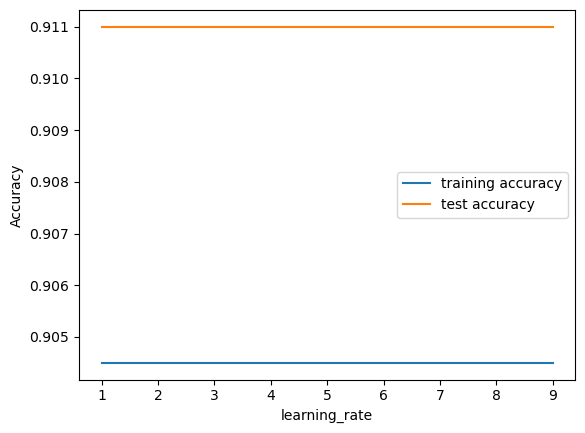

In [86]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [87]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [88]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [90]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.904
XGBoost Classifier : Accuracy on test Data: 0.911

XGBoost Classifier : f1_score on training Data: 0.896
XGBoost Classifier : f1_score on test Data: 0.902

XGBoost Classifier : Recall on training Data: 0.819
XGBoost Classifier : Recall on test Data: 0.819

XGBoost Classifier : precision on training Data: 0.988
XGBoost Classifier : precision on test Data: 0.988


In [91]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [92]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [93]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [94]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.904
Multi-layer Perceptron : Accuracy on test Data: 0.911

Multi-layer Perceptron : f1_score on training Data: 0.895
Multi-layer Perceptron : f1_score on test Data: 0.895

Multi-layer Perceptron : Recall on training Data: 0.818
Multi-layer Perceptron : Recall on test Data: 0.828

Multi-layer Perceptron : precision on training Data: 0.988
Multi-layer Perceptron : precision on test Data: 0.991


In [95]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [96]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108 (432.00 B)

 Trainable params: 108 (432.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.5792 - loss: -1.1711 - val_accuracy: 0.6634 - val_loss: -70.2790
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.6520 - loss: -424.8165 - val_accuracy: 0.6634 - val_loss: -4389.0918
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.6584 - loss: -9897.6865 - val_accuracy: 0.6634 - val_loss: -45061.8438
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.6564 - loss: -72912.7188 - val_accuracy: 0.6634 - val_loss: -215046.5156
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.6535 - loss: -302823.8750 - val_accuracy: 0.6634 - val_loss: -698316.3125
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.6532 - loss: -896550.8750 - val_accuracy: 0.6634 - val_loss: -1781494.5000
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.6526 - loss: -2138015.7500 - val_accuracy: 0.6634 - val_loss: -3851645.5000
Epoch 8/10
400/400 ━━

In [97]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.6533 - loss: -20920560.0000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.6571 - loss: -21275532.0000

Autoencoder: Accuracy on training Data: 0.656
Autoencoder: Accuracy on test Data: 0.647


In [98]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [99]:
clf.score(X_train, y_train)

0.9029375

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.90925


In [101]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4037
           1       0.99      0.82      0.90      3963

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<Axes: >

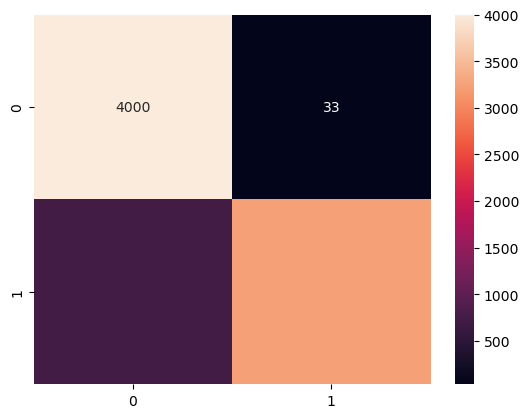

In [103]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [101]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = LogisticRegression(random_state=0)
# model_4 = BernoulliNB()
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3),
                                        ('DT', model_5)], voting='hard')

In [102]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

KeyboardInterrupt: 

In [104]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.901875
Accuracy for test dataset for naive bayes reg :  0.9105


In [105]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [106]:
phising = ensemble.predict(input)

TypeError: float() argument must be a string or a real number, not 'method'

In [107]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=15)  # Select top 10 features
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Have_At
URL_Length
URL_Depth
Redirection
https_Domain
TinyURL
Prefix/Suffix
DNS_Record
Web_Traffic
Domain_Age
Domain_End
iFrame
Mouse_Over
Right_Click
Web_Forwards


In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating a DataFrame to store feature selection results
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

print("Number of features after feature selection:", len(best_features))
print(best_features)

AttributeError: 'DataFrame' object has no attribute 'append'

In [109]:

# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'best_features' is not defined

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [102]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [103]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.903,0.892,0.796,0.993
1,K-Nearest Neighbors,0.812,0.823,0.879,0.771
2,Support Vector Machine,0.910,0.902,0.819,0.988
3,Naive Bayes Classifier,0.903,0.892,0.796,0.993
4,Decision Tree,0.911,0.902,0.819,0.988
5,Random Forest,0.911,0.902,0.819,0.988
6,Gradient Boosting Classifier,0.911,0.902,0.819,0.988
7,CatBoost Classifier,0.911,0.902,0.819,0.988
8,XGBoost Classifier,0.911,0.902,0.819,0.988
9,Multi-layer Perceptron,0.911,0.902,0.818,0.988


In [104]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [105]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.911,0.902,0.819,0.988
1,Random Forest,0.911,0.902,0.819,0.988
2,Gradient Boosting Classifier,0.911,0.902,0.819,0.988
3,CatBoost Classifier,0.911,0.902,0.819,0.988
4,XGBoost Classifier,0.911,0.902,0.819,0.988
5,Multi-layer Perceptron,0.911,0.902,0.818,0.988
6,Support Vector Machine,0.910,0.902,0.819,0.988
7,Logistic Regression,0.903,0.892,0.796,0.993
8,Naive Bayes Classifier,0.903,0.892,0.796,0.993
9,K-Nearest Neighbors,0.812,0.823,0.879,0.771


## Storing Best Model

In [106]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [107]:
import os
import pickle

if not os.path.exists('pickle'):
    os.makedirs('pickle')

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [ ]:
current_directory = os.getcwd()

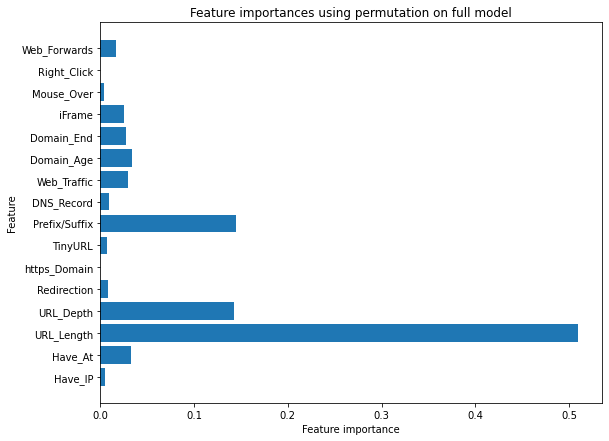

In [108]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
